In [ ]:
# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, Conv1D, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation,MaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OneHotEncoder

# Кодирование тестовых меток
from sklearn.preprocessing import LabelEncoder

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam

# Загрузка датасетов из облака google
import gdown

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

# Для отрисовки графиков
import seaborn as sns
import warnings

## **anvil**

In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.3 MB/s 
     |████████████████████████████████| 51 kB 257 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=9ddde63c1674dea2949f03229c9007b7fd31d04a01a313d5a4cbb6c73db3e773
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
import anvil.server
anvil.server.connect("4JRGT4YFRHXVKN2E6DCZ236W-BMK4WG3FUTLLY6FJ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


## **Загрузка датасетов**

In [ ]:
!unzip -q "SFO.zip" -d /content/ # подгрузим базу в ноутбук в директорию 'content/'


In [ ]:
ls

'1. Компании.xlsx'       sample_data/
'2. Продукты_new.xlsx'   SFO.zip
'3. Отрасли.xlsx'       'Пояснение к датасету.docx'
'4. Технологии.xlsx'    'Справочник. Отрасли и подотрасли.xlsx'
 Merged.csv             'Справочник. Технологии.xlsx'


In [ ]:
xlcom = pd.ExcelFile('1. Компании.xlsx')

In [ ]:
print(xlcom.sheet_names)

['Sheet0']


In [ ]:
dfcom = xlcom.parse('Sheet0')

In [ ]:
dfcom.columns = dfcom.columns.str.replace(" ", "_")
dfcom

global_id Наименование_поддержанной_компании  \
0        784577                   ООО "АГРОПЛАЗМА"   
1        810784    ООО "ЛАБОРАТОРИЯ НАНОСЕМАНТИКА"   
2        810785                        ООО "РОМЕТ"   
3        810786                      АО "СМАРТФИН"   
4        810787                       ООО "УЧИ.РУ"   
...         ...                                ...   
3712    1064098                   ООО "ПРОКОНСАЛТ"   
3713    1064163               ООО "ШЕРПА РОБОТИКС"   
3714    1064380               ООО "ИСТИННЫЙ МЕТОД"   
3715    1064405                          ООО "ГБЦ"   
3716    1064409                          ООО "ГБЦ"   

                                                Отрасль  \
0              СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
1                           ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
2                                        ПРОМЫШЛЕННОСТЬ   
3                           ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
4                           ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
...                                                 ...   
3712  ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...   
3713                        ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3714                        ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3715                                     ПРОМЫШЛЕННОСТЬ   
3716                                     ПРОМЫШЛЕННОСТЬ   

                                             Подотрасль  \
0                                       Растениеводство   
1     Деятельность по созданию новых информационных ...   
2     Металлургия, металлопродукция, производство го...   
3           Разработка аппаратно-программных комплексов   
4             Специализированные информационные системы   
...                                                 ...   
3712  Заказные исследования и разработки, государств...   
3713          Специализированные информационные системы   
3714          Специализированные информационные системы   
3715                      Производство новых материалов   
3716                      Производство новых материалов   

                     Технология_(1_уровень)  \
0              Синтез материальных объектов   
1                         Синтез информации   
2              Синтез материальных объектов   
3     Обработка и преобразование информации   
4                         Синтез информации   
...                                     ...   
3712           Синтез материальных объектов   
3713                      Синтез информации   
3714  Обработка и преобразование информации   
3715           Синтез материальных объектов   
3716           Синтез материальных объектов   

                   Технология_(2_уровень)  \
0        Синтез живых организмов и систем   
1                 Искусственный интеллект   
2         Новые производственные процессы   
3     Обработка и хранение больших данных   
4                         Синтез контента   
...                                   ...   
3712                 Инженерные комплексы   
3713              Искусственный интеллект   
3714  Интеллектуальные системы управления   
3715        Материалы с новыми свойствами   
3716        Материалы с новыми свойствами   

                                 Технология_(3_уровень)  \
0                          Технологии селекции растений   
1     Обработка естественных языков (перевод, класси...   
2                             Технологии сварки и пайки   
3                    Интерфейсы обмена большими данными   
4                      Синтез образовательного контента   
...                                                 ...   
3712                          Робототехнические решения   
3713  Экспертные системы на базе искусственного инте...   
3714  Системы управления жизненным циклом сложных ин...   
3715                         Изменение объемных свойств   
3716                         Изменение объемных свойств   

                                              Сайт  \
0                        http://www.agroplazma.com   
1               

In [ ]:
dfcom.describe(include=[object])  

Наименование_поддержанной_компании                      Отрасль  \
count                                3717                         3717   
unique                               3362                           21   
top                           ООО "БАЗИС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
freq                                    4                         1237   

                                       Подотрасль  \
count                                        3717   
unique                                        124   
top     Специализированные информационные системы   
freq                                          402   

              Технология_(1_уровень)   Технология_(2_уровень)  \
count                           3717                     3717   
unique                             6                       32   
top     Синтез материальных объектов  Искусственный интеллект   
freq                            1342                      527   

                             Технология_(3_уровень)        Сайт  \
count                                          3717        3717   
unique                                          205        2406   
top     Компьютерное зрение и обработка изображений  Не указано   
freq                                            173         950   

       Описание_компании  
count               3717  
unique              3514  
top                  н/д  
freq                  11

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "БАЗИС"')]

global_id Наименование_поддержанной_компании  \
280      811078                        ООО "БАЗИС"   
1217    1023566                        ООО "БАЗИС"   
1698    1030265                        ООО "БАЗИС"   
1712    1030505                        ООО "БАЗИС"   

                                               Отрасль  \
280                        ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1217                                    ПРОМЫШЛЕННОСТЬ   
1698                                    ПРОМЫШЛЕННОСТЬ   
1712  БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ   

                                             Подотрасль  \
280         Разработка аппаратно-программных комплексов   
1217  Производство электронного и электрического обо...   
1698  Производство электронного и электрического обо...   
1712                                       Охрана труда   

                     Технология_(1_уровень)  \
280   Обработка и преобразование информации   
1217           Синтез материальных объектов   
1698           Синтез материальных объектов   
1712                      Синтез информации   

                                 Технология_(2_уровень)  \
280                    Технологии цифровой безопасности   
1217                    Новые производственные процессы   
1698                    Новые производственные процессы   
1712  Формирование электромагнитных управляющих сигн...   

                                 Технология_(3_уровень)  \
280         Контроль вторжений в информационные системы   
1217                          Технологии сварки и пайки   
1698                          Технологии сварки и пайки   
1712  Управление устройствами (свет, двигатели и дру...   

                                     Сайт  \
280   https://navigator.sk.ru/orn/1121463   
1217              http://www.bazis.vrn.ru   
1698              http://www.bazis.vrn.ru   
1712                           Не указано   

                                      Описание_компании  
280   «ТИОНИКС» – разработчик программных продуктов ...  
1217  Компания "БАЗИС" является отечественным произв...  
1698  Компания "БАЗИС" является отечественным произв...  
1712  Общество с ограниченной ответственностью «БАЗИ...

In [ ]:
dfcom[(dfcom.Подотрасль=="н/д")]

global_id      Наименование_поддержанной_компании Отрасль Подотрасль  \
944     940986                    ООО«АЛИБАБА.КОМ(РУ)»     н/д        н/д   
945     941064  ООО «Производственная компания «Борец»     н/д        н/д   

    Технология_(1_уровень) Технология_(2_уровень) Технология_(3_уровень) Сайт  \
944                    н/д                    н/д                    н/д    -   
945                    н/д                    н/д                    н/д    -   

                                     Описание_компании  
944  Cоздание крупнейшего совместного предприятия в...  
945  Поддержка Компании в масштабных научных исслед...

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfcom['Наименование_поддержанной_компании'].value_counts().head(50)

ООО "БАЗИС"                                4
ООО "СПУТНИКС"                             4
ООО "АВ СОФТ"                              4
ООО "МЕС-ТЕХНОЛОГИИ"                       4
ООО "ТЕРЕБРА"                              4
ООО "БАЗОВЫЕ ТЕХНОЛОГИИ"                   4
ООО "НПО "АТОМ"                            3
АО "ГРУППА Т-1"                            3
ООО "УМНЫЙ ГОРОД"                          3
ООО "АРМАТЕХ"                              3
ООО "БИОЭНЕРДЖИ"                           3
ООО "СПЛАВ-АРМ"                            3
ООО "ТЕКСЕЛ"                               3
ООО "ПЕТР ТЕЛЕГИН"                         3
ООО "ГЕОСПЛИТ"                             3
ООО "АЛГОРИТМ"                             3
ООО "КОЛЕТЕКС"                             3
ООО "НПП НАНОСКАН"                         3
ООО "ПРОМОБОТ"                             3
ООО "ЭКСПОНЕНТА"                           3
ООО "ИПРО"                                 3
ООО "БИЭЙР СИСТЕМЫ"                        3
ООО "НИЖЕГ

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "СПУТНИКС"')]

global_id Наименование_поддержанной_компании  \
1401    1025632                     ООО "СПУТНИКС"   
1629    1029073                     ООО "СПУТНИКС"   
2048    1036519                     ООО "СПУТНИКС"   
3076    1053716                     ООО "СПУТНИКС"   

                                                Отрасль  \
1401  ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...   
1629  ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...   
2048  ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...   
3076  ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...   

                                Подотрасль  \
1401  Инженерно-техническое проектирование   
1629  Инженерно-техническое проектирование   
2048  Инженерно-техническое проектирование   
3076  Инженерно-техническое проектирование   

                     Технология_(1_уровень)  \
1401  Обработка и преобразование информации   
1629  Обработка и преобразование информации   
2048  Обработка и преобразование информации   
3076  Обработка и преобразование информации   

                   Технология_(2_уровень)  \
1401                      Передача данных   
1629  Обработка и хранение больших данных   
2048  Обработка и хранение больших данных   
3076  Обработка и хранение больших данных   

                        Технология_(3_уровень)            Сайт  \
1401    Технологии оптимизации передачи данных  www.sputnix.ru   
1629  Геоданные и геоинформационные технологии  www.sputnix.ru   
2048  Геоданные и геоинформационные технологии  www.sputnix.ru   
3076  Геоданные и геоинформационные технологии  www.sputnix.ru   

                                      Описание_компании  
1401  Российская частная компания-производитель высо...  
1629  Российская частная компания-производитель высо...  
2048  Российская частная компания-производитель высо...  
3076  Российская частная компания-производитель высо...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "НПО "АТОМ"')]

global_id Наименование_поддержанной_компании         Отрасль  \
1371    1025314                    ООО "НПО "АТОМ"  ПРОМЫШЛЕННОСТЬ   
1627    1029043                    ООО "НПО "АТОМ"  ПРОМЫШЛЕННОСТЬ   
2734    1048074                    ООО "НПО "АТОМ"  ПРОМЫШЛЕННОСТЬ   

                         Подотрасль        Технология_(1_уровень)  \
1371  Производство новых материалов  Синтез материальных объектов   
1627  Производство новых материалов  Синтез материальных объектов   
2734                 Машиностроение  Синтез материальных объектов   

               Технология_(2_уровень)     Технология_(3_уровень)  \
1371    Материалы с новыми свойствами    Создание новых структур   
1627    Материалы с новыми свойствами    Создание новых структур   
2734  Новые производственные процессы  Технологии сварки и пайки   

                                    Сайт  \
1371  http://innovation-tech.ru/npo-atom   
1627  http://innovation-tech.ru/npo-atom   
2734  http://innovation-tech.ru/npo-atom   

                                      Описание_компании  
1371  Основной вид деятельности (код и наименование ...  
1627  Основной вид деятельности (код и наименование ...  
2734  Основной вид деятельности (код и наименование ...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'АО "ГРУППА Т-1"')]

global_id Наименование_поддержанной_компании  \
485      811304                    АО "ГРУППА Т-1"   
1950    1034697                    АО "ГРУППА Т-1"   
3016    1052785                    АО "ГРУППА Т-1"   

                          Отрасль                                 Подотрасль  \
485   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ  Специализированные информационные системы   
1950  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ  Специализированные информационные системы   
3016  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ  Специализированные информационные системы   

                     Технология_(1_уровень)  \
485   Обработка и преобразование информации   
1950                      Синтез информации   
3016  Обработка и преобразование информации   

                   Технология_(2_уровень)  \
485   Обработка и хранение больших данных   
1950              Искусственный интеллект   
3016  Обработка и хранение больших данных   

                                 Технология_(3_уровень)  \
485                          Предсказательная аналитика   
1950  Машинное обучение включая глубокое обучение и ...   
3016           Геоданные и геоинформационные технологии   

                         Сайт  \
485   https://www.t1-group.ru   
1950          www.t1-group.ru   
3016          www.t1-group.ru   

                                      Описание_компании  
485   Группа Т-1 решает проблему объективного контро...  
1950  Группа Т-1 решает проблему объективного контро...  
3016  Компания присутствует на рынке с 2015 года и и...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "УМНЫЙ ГОРОД"')]

global_id Наименование_поддержанной_компании  \
206      810997                  ООО "УМНЫЙ ГОРОД"   
1438    1026051                  ООО "УМНЫЙ ГОРОД"   
3659    1062947                  ООО "УМНЫЙ ГОРОД"   

                          Отрасль  \
206   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1438  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3659          ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ   

                                             Подотрасль  \
206   Рекомендательные системы, персональные помощни...   
1438          Специализированные информационные системы   
3659                                      Прочие услуги   

                     Технология_(1_уровень)  \
206                       Синтез информации   
1438  Обработка и преобразование информации   
3659                      Синтез информации   

                   Технология_(2_уровень)  \
206               Искусственный интеллект   
1438  Интеллектуальные системы управления   
3659              Искусственный интеллект   

                                 Технология_(3_уровень)  \
206   Машинное обучение включая глубокое обучение и ...   
1438    Системы планирования ресурсов предприятий (ERP)   
3659  Экспертные системы на базе искусственного инте...   

                               Сайт  \
206        https://beyondviolet.com   
1438        http://smartbimcity.ru/   
3659  https://partner.wellchoice.ru   

                                      Описание_компании  
206   «Хороший Выбор Онлайн» - CDP платформа в секто...  
1438  Разработка системы управления эксплуатацией го...  
3659  «Хороший Выбор» - онлайн-платформа на базе ана...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "ТЕКСЕЛ"')]

global_id Наименование_поддержанной_компании  \
1423    1025857                       ООО "ТЕКСЕЛ"   
1757    1031303                       ООО "ТЕКСЕЛ"   
3106    1054167                       ООО "ТЕКСЕЛ"   

                          Отрасль                                 Подотрасль  \
1423  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ  Специализированные информационные системы   
1757  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ  Специализированные информационные системы   
3106  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ  Специализированные информационные системы   

                     Технология_(1_уровень)  \
1423  Обработка и преобразование информации   
1757                      Синтез информации   
3106                      Синтез информации   

                   Технология_(2_уровень)  \
1423  Обработка и хранение больших данных   
1757              Искусственный интеллект   
3106              Искусственный интеллект   

                                 Технология_(3_уровень)                Сайт  \
1423  Методы и способы визуализации, представления и...  www.texel.graphics   
1757     Перспективные методы искусственного интеллекта  www.texel.graphics   
3106  Машинное обучение включая глубокое обучение и ...  www.texel.graphics   

                                      Описание_компании  
1423  ООО "Тексел" является разработчиком программно...  
1757  ООО "Тексел" является разработчиком программно...  
3106  ООО "Тексел" является разработчиком программно...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "ПЕТР ТЕЛЕГИН"')]

global_id Наименование_поддержанной_компании          Отрасль  \
1313    1024640                 ООО "ПЕТР ТЕЛЕГИН"  ЗДРАВООХРАНЕНИЕ   
1640    1029279                 ООО "ПЕТР ТЕЛЕГИН"  ЗДРАВООХРАНЕНИЕ   
3220    1056000                 ООО "ПЕТР ТЕЛЕГИН"  ЗДРАВООХРАНЕНИЕ   

                                             Подотрасль  \
1313  Производство медицинских изделий для диагности...   
1640  Производство медицинских изделий для диагности...   
3220  Производство медицинских изделий для диагности...   

                     Технология_(1_уровень)  \
1313  Обработка и преобразование информации   
1640  Обработка и преобразование информации   
3220  Обработка и преобразование информации   

                   Технология_(2_уровень)  \
1313  Интеллектуальные системы управления   
1640  Интеллектуальные системы управления   
3220  Интеллектуальные системы управления   

                                 Технология_(3_уровень)                  Сайт  \
1313  Медицинские и лабораторные информационные системы  http://www.bplab.ru/   
1640  Медицинские и лабораторные информационные системы          www.bplab.ru   
3220  Медицинские и лабораторные информационные системы          www.bplab.ru   

                                      Описание_компании  
1313  ООО “Петр Телегин” - производитель амбулаторны...  
1640  ООО “Петр Телегин” - производитель амбулаторны...  
3220  ООО “Петр Телегин” - производитель амбулаторны...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "УМНЫЙ ГОРОД"')]

global_id Наименование_поддержанной_компании  \
206      810997                  ООО "УМНЫЙ ГОРОД"   
1438    1026051                  ООО "УМНЫЙ ГОРОД"   
3659    1062947                  ООО "УМНЫЙ ГОРОД"   

                          Отрасль  \
206   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1438  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3659          ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ   

                                             Подотрасль  \
206   Рекомендательные системы, персональные помощни...   
1438          Специализированные информационные системы   
3659                                      Прочие услуги   

                     Технология_(1_уровень)  \
206                       Синтез информации   
1438  Обработка и преобразование информации   
3659                      Синтез информации   

                   Технология_(2_уровень)  \
206               Искусственный интеллект   
1438  Интеллектуальные системы управления   
3659              Искусственный интеллект   

                                 Технология_(3_уровень)  \
206   Машинное обучение включая глубокое обучение и ...   
1438    Системы планирования ресурсов предприятий (ERP)   
3659  Экспертные системы на базе искусственного инте...   

                               Сайт  \
206        https://beyondviolet.com   
1438        http://smartbimcity.ru/   
3659  https://partner.wellchoice.ru   

                                      Описание_компании  
206   «Хороший Выбор Онлайн» - CDP платформа в секто...  
1438  Разработка системы управления эксплуатацией го...  
3659  «Хороший Выбор» - онлайн-платформа на базе ана...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "УМНЫЙ ГОРОД"')]

global_id Наименование_поддержанной_компании  \
206      810997                  ООО "УМНЫЙ ГОРОД"   
1438    1026051                  ООО "УМНЫЙ ГОРОД"   
3659    1062947                  ООО "УМНЫЙ ГОРОД"   

                          Отрасль  \
206   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1438  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3659          ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ   

                                             Подотрасль  \
206   Рекомендательные системы, персональные помощни...   
1438          Специализированные информационные системы   
3659                                      Прочие услуги   

                     Технология_(1_уровень)  \
206                       Синтез информации   
1438  Обработка и преобразование информации   
3659                      Синтез информации   

                   Технология_(2_уровень)  \
206               Искусственный интеллект   
1438  Интеллектуальные системы управления   
3659              Искусственный интеллект   

                                 Технология_(3_уровень)  \
206   Машинное обучение включая глубокое обучение и ...   
1438    Системы планирования ресурсов предприятий (ERP)   
3659  Экспертные системы на базе искусственного инте...   

                               Сайт  \
206        https://beyondviolet.com   
1438        http://smartbimcity.ru/   
3659  https://partner.wellchoice.ru   

                                      Описание_компании  
206   «Хороший Выбор Онлайн» - CDP платформа в секто...  
1438  Разработка системы управления эксплуатацией го...  
3659  «Хороший Выбор» - онлайн-платформа на базе ана...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "АРМАТЕХ"')]

global_id Наименование_поддержанной_компании         Отрасль  \
1189    1023278                      ООО "АРМАТЕХ"  ПРОМЫШЛЕННОСТЬ   
1561    1027931                      ООО "АРМАТЕХ"  ПРОМЫШЛЕННОСТЬ   
2387    1042234                      ООО "АРМАТЕХ"  ПРОМЫШЛЕННОСТЬ   

          Подотрасль        Технология_(1_уровень) Технология_(2_уровень)  \
1189  Машиностроение  Синтез материальных объектов   Инженерные комплексы   
1561  Машиностроение  Синтез материальных объектов   Инженерные комплексы   
2387  Машиностроение  Синтез материальных объектов   Инженерные комплексы   

                          Технология_(3_уровень)                     Сайт  \
1189  Гидравлические машины, гидропневмоагрегаты               Не указано   
1561  Гидравлические машины, гидропневмоагрегаты               Не указано   
2387  Гидравлические машины, гидропневмоагрегаты  http://armatech2016.ru/   

                                      Описание_компании  
1189  ООО "Арматурные технологии", начиная с 2016 го...  
1561  ООО "Арматурные технологии", начиная с 2016 го...  
2387  ООО "Арматурные технологии", начиная с 2016 го...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "БИОЭНЕРДЖИ"')]

global_id Наименование_поддержанной_компании     Отрасль  \
1318    1024688                   ООО "БИОЭНЕРДЖИ"  ЭНЕРГЕТИКА   
1528    1027379                   ООО "БИОЭНЕРДЖИ"  ЭНЕРГЕТИКА   
2233    1039755                   ООО "БИОЭНЕРДЖИ"  ЭНЕРГЕТИКА   

                     Подотрасль             Технология_(1_уровень)  \
1318  Альтернативная энергетика  Преобразование и хранение энергии   
1528  Альтернативная энергетика  Преобразование и хранение энергии   
2233  Альтернативная энергетика  Преобразование и хранение энергии   

                   Технология_(2_уровень)  \
1318  Технологии генерации электроэнергии   
1528  Технологии генерации электроэнергии   
2233  Технологии генерации электроэнергии   

                        Технология_(3_уровень)        Сайт  \
1318  Технологии получения энергии из биомассы  Не указано   
1528  Технологии получения энергии из биомассы  Не указано   
2233  Технологии получения энергии из биомассы  Не указано   

                                      Описание_компании  
1318  ООО "БиоЭнерджи" создана в 2018 году и специал...  
1528  ООО "БиоЭнерджи" создана в 2018 году и специал...  
2233  ООО "БиоЭнерджи" создана в 2018 году и специал...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "СПЛАВ-АРМ"')]

global_id Наименование_поддержанной_компании         Отрасль  \
1192    1023305                    ООО "СПЛАВ-АРМ"  ПРОМЫШЛЕННОСТЬ   
1637    1029232                    ООО "СПЛАВ-АРМ"  ПРОМЫШЛЕННОСТЬ   
3135    1054651                    ООО "СПЛАВ-АРМ"  ПРОМЫШЛЕННОСТЬ   

                                             Подотрасль  \
1192  Металлургия, металлопродукция, производство го...   
1637  Металлургия, металлопродукция, производство го...   
3135  Металлургия, металлопродукция, производство го...   

            Технология_(1_уровень)           Технология_(2_уровень)  \
1192  Синтез материальных объектов             Инженерные комплексы   
1637  Синтез материальных объектов  Новые производственные процессы   
3135  Синтез материальных объектов  Новые производственные процессы   

                                 Технология_(3_уровень)  \
1192  Оборудование для электрохимической и электрофи...   
1637                               Процессы металлургии   
3135                               Процессы металлургии   

                                     Сайт  \
1192                           Не указано   
1637  http://innovation-tech.ru/splav-arm   
3135  http://innovation-tech.ru/splav-arm   

                                      Описание_компании  
1192  1.Поставка трубопроводной арматуры, насосного ...  
1637  1.Поставка трубопроводной арматуры, насосного ...  
3135  1.Поставка трубопроводной арматуры, насосного ...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "ТЕРЕБРА"')]

global_id Наименование_поддержанной_компании  \
385      811198                      ООО "ТЕРЕБРА"   
1741    1031055                      ООО "ТЕРЕБРА"   
1938    1034379                      ООО "ТЕРЕБРА"   
3393    1058825                      ООО "ТЕРЕБРА"   

                                                Отрасль  \
385   ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...   
1741                                     ПРОМЫШЛЕННОСТЬ   
1938                                     ПРОМЫШЛЕННОСТЬ   
3393                                     ПРОМЫШЛЕННОСТЬ   

                                Подотрасль        Технология_(1_уровень)  \
385   Инженерно-техническое проектирование  Синтез материальных объектов   
1741                        Машиностроение  Синтез материальных объектов   
1938                        Машиностроение  Синтез материальных объектов   
3393                Пищевая промышленность  Синтез материальных объектов   

     Технология_(2_уровень)           Технология_(3_уровень)  \
385     Промышленный дизайн                       Эргономика   
1741   Инженерные комплексы  Сельскохозяйственный инжиниринг   
1938   Инженерные комплексы  Сельскохозяйственный инжиниринг   
3393   Инженерные комплексы  Сельскохозяйственный инжиниринг   

                     Сайт                                  Описание_компании  
385    http://terebra.ru/  Terebra - инжиниринговая компания, владеющая т...  
1741           Не указано  Основная область деятельности предприятия – на...  
1938           Не указано  Основная область деятельности предприятия – на...  
3393  https://terebra.ru/  Основная область деятельности предприятия – на...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "МЕС-ТЕХНОЛОГИИ"')]

global_id Наименование_поддержанной_компании  \
1302    1024496               ООО "МЕС-ТЕХНОЛОГИИ"   
1439    1026066               ООО "МЕС-ТЕХНОЛОГИИ"   
3115    1054311               ООО "МЕС-ТЕХНОЛОГИИ"   
3186    1055455               ООО "МЕС-ТЕХНОЛОГИИ"   

                          Отрасль  \
1302  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1439  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3115  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3186  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   

                                             Подотрасль  \
1302  Деятельность по созданию новых информационных ...   
1439  Деятельность по созданию новых информационных ...   
3115  Деятельность по созданию новых информационных ...   
3186  Деятельность по созданию новых информационных ...   

                     Технология_(1_уровень)  \
1302  Обработка и преобразование информации   
1439                      Синтез информации   
3115  Обработка и преобразование информации   
3186  Обработка и преобразование информации   

                   Технология_(2_уровень)  \
1302  Интеллектуальные системы управления   
1439              Искусственный интеллект   
3115  Интеллектуальные системы управления   
3186  Интеллектуальные системы управления   

                                 Технология_(3_уровень)                Сайт  \
1302  Системы управления производственными процессам...          Не указано   
1439                    Технологии поиска и оптимизации  http://mestech.ru/   
3115  Системы управления производственными процессам...  http://mestech.ru/   
3186  Системы управления производственными процессам...  http://mestech.ru/   

                                      Описание_компании  
1302  Компания «МЕС-Технологии» внедряет информацион...  
1439  Компания «МЕС-Технологии» внедряет информацион...  
3115  Система обеспечивает реализацию функции планир...  
3186  омпания «МЕС-Технологии» внедряет информационн...

In [ ]:
dfcom[(dfcom.Наименование_поддержанной_компании	== 'ООО "БАЗОВЫЕ ТЕХНОЛОГИИ"')]

global_id Наименование_поддержанной_компании  \
1215    1023548           ООО "БАЗОВЫЕ ТЕХНОЛОГИИ"   
1539    1027570           ООО "БАЗОВЫЕ ТЕХНОЛОГИИ"   
2182    1038828           ООО "БАЗОВЫЕ ТЕХНОЛОГИИ"   
3544    1061069           ООО "БАЗОВЫЕ ТЕХНОЛОГИИ"   

                          Отрасль  \
1215  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1539  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
2182               ПРОМЫШЛЕННОСТЬ   
3544  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   

                                       Подотрасль      Технология_(1_уровень)  \
1215  Разработка аппаратно-программных комплексов           Синтез информации   
1539  Разработка аппаратно-программных комплексов           Синтез информации   
2182                                Робототехника  Сбор информации об объекте   
3544  Разработка аппаратно-программных комплексов           Синтез информации   

        Технология_(2_уровень)  \
1215   Искусственный интеллект   
1539   Искусственный интеллект   
2182  Физико-химические методы   
3544   Искусственный интеллект   

                                 Технология_(3_уровень)           Сайт  \
1215        Компьютерное зрение и обработка изображений  www.btlabs.ru   
1539  Машинное обучение включая глубокое обучение и ...  www.btlabs.ru   
2182  Регистрация и преобразование СВЧ и терагерцово...  www.btlabs.ru   
3544        Компьютерное зрение и обработка изображений  www.btlabs.ru   

                                      Описание_компании  
1215  ООО "Базовые технологии" занимается исследован...  
1539  ООО "Базовые технологии" занимается исследован...  
2182  ООО "Базовые технологии" занимается исследован...  
3544  ООО "Базовые технологии" занимается исследован...

In [ ]:
bt2 = dfcom['Наименование_поддержанной_компании'].value_counts()
dfcom[dfcom['Наименование_поддержанной_компании'].isin(bt2[bt2 >= 2].index)].sort_values(['Наименование_поддержанной_компании']).head(50)


global_id                 Наименование_поддержанной_компании  \
1434    1025975                                   АО "АНТИПЛАГИАТ"   
52       810837                                   АО "АНТИПЛАГИАТ"   
3053    1053344                                        АО "ВНИТЭП"   
1616    1028849                                        АО "ВНИТЭП"   
485      811304                                    АО "ГРУППА Т-1"   
1950    1034697                                    АО "ГРУППА Т-1"   
3016    1052785                                    АО "ГРУППА Т-1"   
2717    1047806                                     АО "ДИАКОН-ДС"   
1932    1034285                                     АО "ДИАКОН-ДС"   
1785    1031851                                          АО "ЗНТЦ"   
3008    1052653                                          АО "ЗНТЦ"   
953     1011430                                          АО "ЗНТЦ"   
1419    1025814                          АО "ФИРМА "ПЕРМАНЕНТ К&М"   
1880    1033391                          АО "ФИРМА "ПЕРМАНЕНТ К&М"   
2299    1040809                                          АО "ЦРИТ"   
2658    1046804                                          АО "ЦРИТ"   
2058    1036688                                   АО "ЭНПЦ ЭПИТАЛ"   
1364    1025235                                   АО "ЭНПЦ ЭПИТАЛ"   
3276    1056860  МОСКОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ ИМЕНИ М...   
2898    1050756  МОСКОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ ИМЕНИ М...   
1989    1035514                                        ООО "5 ДЖИ"   
1475    1026506                                        ООО "5 ДЖИ"   
3707    1063839                                      ООО "АВ СОФТ"   
3667    1063070                                      ООО "АВ СОФТ"   
2134    1037976                                      ООО "АВ СОФТ"   
3705    1063759                                      ООО "АВ СОФТ"   
470      811287                                      ООО "АГЕНТУМ"   
3207    1055801                                      ООО "АГЕНТУМ"   
2268    1040306                                  ООО "АГР СОФТВЕР"   
2931    1051417                                  ООО "АГР СОФТВЕР"   
245      811041                                  ООО "АГР СОФТВЕР"   
1441    1026092                                    ООО "АГРОИНТЕХ"   
1278    1024240                                    ООО "АГРОИНТЕХ"   
2718    1047821                                      ООО "АГРОМИГ"   
2429    1042945                                      ООО "АГРОМИГ"   
3425    1059308                                     ООО "АГРОНОУТ"   
269      811067                                     ООО "АГРОНОУТ"   
240      811036                                       ООО "АЙ-ТОР"   
1705    1030381                                       ООО "АЙ-ТОР"   
1259    1024026                                       ООО "АЙ-ТОР"   
1199    1023381                                      ООО "АЙБРЕЙН"   
408      811222                                      ООО "АЙБРЕЙН"   
1622    1028954                               ООО "АЙКОН ЛАБ ГМБХ"   
411      811225                               ООО "АЙКОН ЛАБ ГМБХ"   
2012    1035912                                      ООО "АЙПИКОМ"   
3555    1061225                                      ООО "АЙПИКОМ"   
2479    1043775                                      ООО "АКВАЛИД"   
1330    1024811                                      ООО "АКВАЛИД"   
630      811463                                      ООО "АКВАЛИД"   
1594    1028495                                        ООО "АКВИЛ"   

                                                Отрасль  \
1434                        ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
52                          ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3053                                     ПРОМЫШЛЕННОСТЬ   
1616                                     ПРОМЫШЛЕННОСТЬ   
485                         ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1950                        ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3016                  

In [ ]:
bt2 = dfcom['Наименование_поддержанной_компании'].value_counts()
dfcom[dfcom['Наименование_поддержанной_компании'].isin(bt2[bt2 >= 2].index)].sort_values(['Наименование_поддержанной_компании'])

global_id                 Наименование_поддержанной_компании  \
1434    1025975                                   АО "АНТИПЛАГИАТ"   
52       810837                                   АО "АНТИПЛАГИАТ"   
3053    1053344                                        АО "ВНИТЭП"   
1616    1028849                                        АО "ВНИТЭП"   
485      811304                                    АО "ГРУППА Т-1"   
...         ...                                                ...   
634      811468                                     ООО НТЦ "РУСЬ"   
2158    1038391                                 ООО ТПК "МАКСИМУМ"   
3433    1059450                                 ООО ТПК "МАКСИМУМ"   
2225    1039624  СИБИРСКИЙ УНИВЕРСИТЕТ НАУКИ И ТЕХНОЛОГИЙ, СИБИ...   
2797    1049064  СИБИРСКИЙ УНИВЕРСИТЕТ НАУКИ И ТЕХНОЛОГИЙ, СИБИ...   

                          Отрасль  \
1434  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
52    ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3053               ПРОМЫШЛЕННОСТЬ   
1616               ПРОМЫШЛЕННОСТЬ   
485   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
...                           ...   
634   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
2158               ПРОМЫШЛЕННОСТЬ   
3433               ПРОМЫШЛЕННОСТЬ   
2225  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
2797  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   

                                       Подотрасль  \
1434    Специализированные информационные системы   
52      Специализированные информационные системы   
3053                               Машиностроение   
1616                               Машиностроение   
485     Специализированные информационные системы   
...                                           ...   
634   Разработка аппаратно-программных комплексов   
2158                               Машиностроение   
3433                               Машиностроение   
2225  Разработка аппаратно-программных комплексов   
2797  Разработка аппаратно-программных комплексов   

                     Технология_(1_уровень)  \
1434                      Синтез информации   
52    Обработка и преобразование информации   
3053  Обработка и преобразование информации   
1616  Обработка и преобразование информации   
485   Обработка и преобразование информации   
...                                     ...   
634                       Синтез информации   
2158           Синтез материальных объектов   
3433           Синтез материальных объектов   
2225           Синтез материальных объектов   
2797           Синтез материальных объектов   

                   Технология_(2_уровень)  \
1434              Искусственный интеллект   
52    Обработка и хранение больших данных   
3053  Интеллектуальные системы управления   
1616  Интеллектуальные системы управления   
485   Обработка и хранение больших данных   
...                                   ...   
634               Искусственный интеллект   
2158                 Инженерные комплексы   
3433                 Инженерные комплексы   
2225                 Инженерные комплексы   
2797                 Инженерные комплексы   

                                 Технология_(3_уровень)  \
1434  Обработка естественных языков (перевод, класси...   
52       Распределенные базы данных  и файловые системы   
3053  Системы управления производственными процессам...   
1616  Системы управления производственными процессам...   
485                          Предсказательная аналитика   
...                                                 ...   
634   Экспертные системы на базе искусственного инте...   
2158             Компоненты робототехники и мехатроники   
3433             Компоненты робототехники и мехатроники   
2225  Платформенные решения малых космических аппара...   
2797  Платформенные решения малых космических аппара...   

                            Сайт  \
1434          www.antiplagiat.ru   
52    https://www.antiplagiat.ru   
3053               www.vnitep.ru   
1616               www.vnitep.ru   
485      https://www.t1-group.ru   
...                          ...   
634          htt

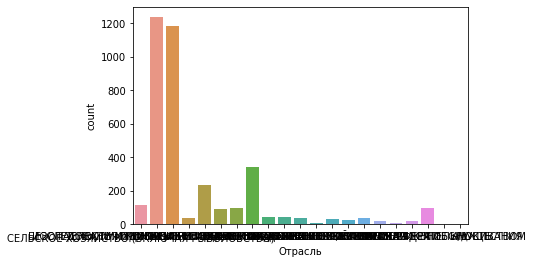

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Отрасль" , data  = dfcom)

In [ ]:
len(dfcom['Подотрасль'].unique())

124

In [ ]:
dfcom['Технология_(1_уровень)'].unique()


array(['Синтез материальных объектов', 'Синтез информации',
       'Обработка и преобразование информации',
       'Сбор информации об объекте', 'Преобразование и хранение энергии',
       'н/д'], dtype=object)

In [ ]:
dfcom['Технология_(2_уровень)'].unique()

array(['Синтез живых организмов и систем', 'Искусственный интеллект',
       'Новые производственные процессы',
       'Обработка и хранение больших данных', 'Синтез контента',
       'Инженерные комплексы', 'Физико-химические методы',
       'Моделирование процессов реального мира (цифровые двойники)',
       'Технологии переработки сырья и отходов включая комплексные экологические проекты',
       'Материалы с новыми свойствами', 'Передача данных',
       'Средства проектирования', 'Ядерные технологии',
       'Интеллектуальные системы управления',
       'Технологии цифровой безопасности', 'Средства разработки',
       'Исследования на живых моделях', 'Методы биоорганической химии',
       'Нейроинтерфейсы',
       'Технологии передачи, распределения и преобразования электроэнергии',
       'Технологии накопления и системы хранения энергии',
       'Технологии распределенного реестра',
       'Технологии генерации электроэнергии',
       'Технологии синтеза графической информации, в

In [ ]:
dfcom['Технология_(3_уровень)'].unique()

array(['Технологии селекции растений',
       'Обработка естественных языков (перевод, классификация, кластеризация и другое)',
       'Технологии сварки и пайки', 'Интерфейсы обмена большими данными',
       'Синтез образовательного контента',
       'Статистическая обработка данных',
       'Системы промышленной безопасности',
       'Регистрация и преобразование акустических сигналов',
       'Моделирование химических процессов',
       'Системы медицинской диагностики, лечения и реабилитации, включая телемедицинские системы',
       'Технологии переработки неорганического сырья и отходов',
       'Процессы органического синтеза',
       'Новые технологии сепарации веществ и фракций, включая газо- и водоочистку',
       'Интегральные фотонные схемы',
       'Совершенствование каталитических процессов',
       'Создание новых структур',
       'Регистрация и преобразование оптических сигналов',
       'Создание новых веществ',
       'Машинное обучение включая глубокое обучение и пре

In [ ]:
len(dfcom['Технология_(3_уровень)'].unique())

205

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfcom.Отрасль.value_counts()

ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ                            1237
ПРОМЫШЛЕННОСТЬ                                         1182
ЗДРАВООХРАНЕНИЕ                                         345
ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРОВАНИЕ     237
СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)                117
ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ                                      99
ЭНЕРГЕТИКА                                               96
ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ                               90
ПРОФЕССИОНАЛЬНАЯ ДЕЯТЕЛЬНОСТЬ ПРОЧАЯ                     46
ОБРАЗОВАНИЕ                                              42
БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ         39
ТРАНСПОРТ, ХРАНЕНИЕ И ЛОГИСТИКА                          38
СТРОИТЕЛЬСТВО                                            35
ФИНАНСОВЫЙ СЕКТОР                                        32
ЖКХ                                                      23
ТОРГОВЛЯ                                                 21
СПОРТ, ТУРИЗМ И СФЕРА ОБСЛУЖИВАНИЯ      

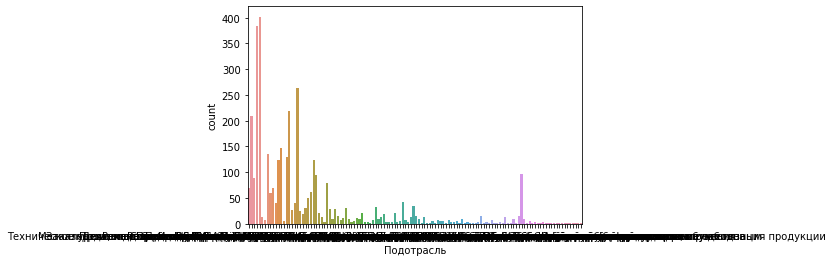

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Подотрасль" , data  = dfcom)

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfcom.Подотрасль.value_counts().head(59)

Специализированные информационные системы                                                   402
Разработка аппаратно-программных комплексов                                                 384
Производство электронного и электрического оборудования                                     264
Машиностроение                                                                              219
Деятельность по созданию новых информационных технологий                                    209
Производство новых материалов                                                               148
Инженерно-техническое проектирование                                                        136
Рекомендательные системы, персональные помощники и агрегаторы                               129
Химическая промышленность                                                                   124
Производство медицинских инструментов и оборудования для терапии и реабилитации             124
Прочие услуги                           

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfcom.Подотрасль.value_counts().tail(59)

Инженерные изыскания и картография                                                              6
Инфраструктура для воздушных перевозок                                                          5
Атомная энергетика                                                                              5
Строительство автомобильных и железных дорог                                                    5
Предоставление услуг в сфере культурно-развлекательного досуга                                  5
Перемещение и экспедирование грузов, другие логистические услуги                                4
Деятельность в области спорта                                                                   4
Гидрометеорология                                                                               4
Курьерская доставка                                                                             4
Производство кокса и нефтепродуктов                                                             4
Торговля розничная в

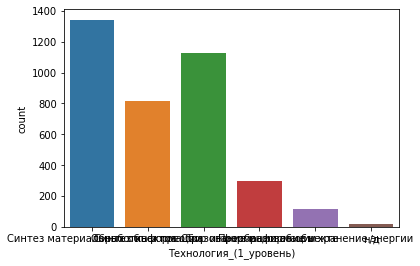

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Технология_(1_уровень)" , data  = dfcom)

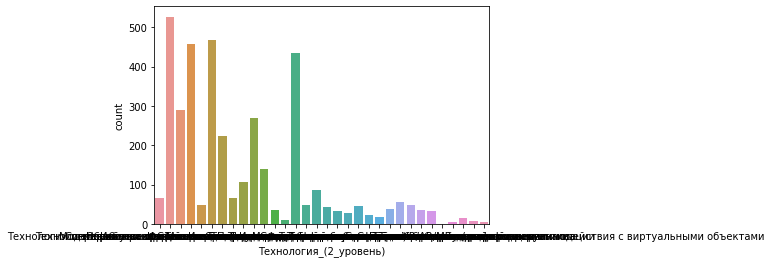

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Технология_(2_уровень)" , data  = dfcom)

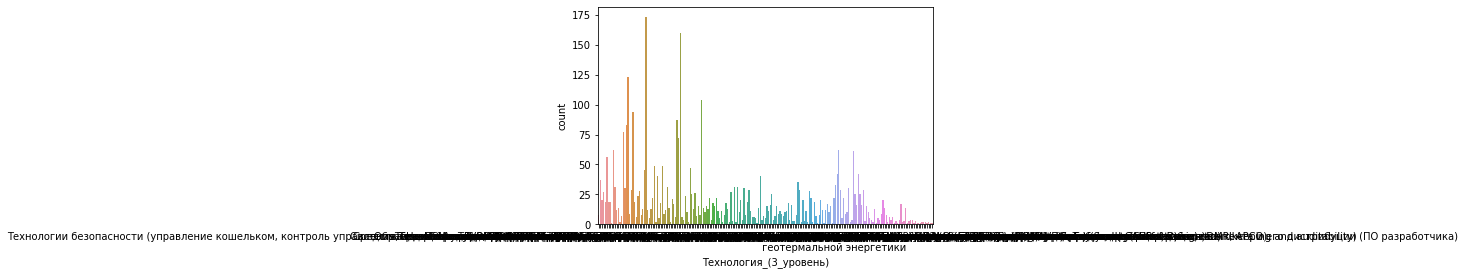

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Технология_(3_уровень)" , data  = dfcom)

In [ ]:
xlprod = pd.ExcelFile('2. Продукты_new.xlsx')

In [ ]:
print(xlprod.sheet_names)

['Sheet0']


In [ ]:
dfprod = xlprod.parse('Sheet0')

In [ ]:
dfprod.columns = dfprod.iloc[0]
dfprod = dfprod.iloc[1:]


In [ ]:
dfprod.columns = dfprod.columns.str.replace(" ", "_")
dfprod

0    global_id_(продукта) Компания  \
1                  812463   811059   
2                  812474   811423   
3                  812477   811310   
4                  812480   811499   
5                  812481   811524   
...                   ...      ...   
6890              1130155  1126818   
6891              1130156  1126827   
6892              1130157  1126836   
6893              1130158  1126846   
6894              1130159  1126856   

0                       Рыночное_наименование_продукта_  \
1                                                     -   
2                                                     -   
3                                          StreamMyData   
4                                                     -   
5                                            eDPROStUdy   
...                                                 ...   
6890  Комплекс суточного мониторивания "Медиком-комб...   
6891  Программное обеспечение для проектирования и и...   
6892  Комплекс средств дистанционной диагностики эле...   
6893      Фарватер-К3Х, Фарватер-K3X-mini, Фарватер КЗМ   
6894                                                  ?   

0                                       Раздел_(ОКПД_2)  \
1       Раздел B. Продукция горнодобывающих производств   
2     Раздел M. Услуги, связанные с научной, инженер...   
3     Раздел M. Услуги, связанные с научной, инженер...   
4     Раздел M. Услуги, связанные с научной, инженер...   
5     Раздел M. Услуги, связанные с научной, инженер...   
...                                                 ...   
6890     Раздел C. Продукция обрабатывающих производств   
6891  Раздел M. Услуги, связанные с научной, инженер...   
6892      Раздел J. Услуги в области информации и связи   
6893  Раздел M. Услуги, связанные с научной, инженер...   
6894     Раздел C. Продукция обрабатывающих производств   

0                                        Класс_(ОКПД_2)  \
1       09. Услуги в области добычи полезных ископаемых   
2     72. Услуги и работы, связанные с научными иссл...   
3     73. Услуги рекламные и услуги по исследованию ...   
4     72. Услуги и работы, связанные с научными иссл...   
5     72. Услуги и работы, связанные с научными иссл...   
...                                                 ...   
6890  26. Оборудование компьютерное, электронное и о...   
6891  72. Услуги и работы, связанные с научными иссл...   
6892     63. Услуги в области информационных технологий   
6893  72. Услуги и работы, связанные с научными иссл...   
6894      20. Вещества химические и продукты химические   

0                                     Подкласс_(ОКПД_2)  \
1     09.9. Услуги в горнодобывающем производстве пр...   
2     72.1. Услуги, связанные с научными исследовани...   
3                                73.1. Услуги рекламные   
4     72.1. Услуги, связанные с научными исследовани...   
5     72.1. Услуги, связанные с научными исследовани...   
...                                                 ...   
6890  26.6. Оборудование для облучения, электрическо...   
6891  72.1. Услуги, связанные с научными исследовани...   
6892  63.1. Услуги по обработке данных, размещению и...   
6893  72.1. Услуги, связанные с научными исследовани...   
6894                   20.5. Продукты химические прочие   

0                                       Группа_(ОКПД_2)  \
1     09.90. Услуги в горнодобывающем производстве п...   
2     72.19. Услуги, связанные с научными исследован...   
3     73.11. Услуги, предоставляемые рекламными аген...   
4     72.19. Услуги, связанные с научными исследован...   
5     72.19. Услуги, связанные с научными исследован...   
...                                                 ...   
6890  26.60. Оборудование для облучения, электрическ...   
6891  72.19. Услуги, связанные с научными исследован...   
6892  63.11. Услуги по обработке данных, размещению ...   
6893  72.19. Услуги, связанные с научными исследован...   
6894  20.59. Продукты химические прочие, не включенн...   

In [ ]:
dfprod.describe(include=[object])  

0      global_id_(продукта) Компания Рыночное_наименование_продукта_  \
count                  6894     6894                            6894   
unique                 6894     3744                            3608   
top                  812463  1064163                               -   
freq                      1       12                             140   

0                                      Раздел_(ОКПД_2)  \
count                                             6894   
unique                                              20   
top     Раздел C. Продукция обрабатывающих производств   
freq                                              2735   

0                                          Класс_(ОКПД_2)  \
count                                                6894   
unique                                                 80   
top     62. Продукты программные и услуги по разработк...   
freq                                                 1383   

0                                       Подкласс_(ОКПД_2)  \
count                                                6894   
unique                                                200   
top     62.0. Продукты программные и услуги по разрабо...   
freq                                                 1383   

0                                         Группа_(ОКПД_2)  \
count                                                6894   
unique                                                309   
top     62.01. Продукты программные и услуги по разраб...   
freq                                                 1266   

0                                Подгруппа_(ОКПД_2)  \
count                                          6894   
unique                                          510   
top     62.01.2. Оригиналы программного обеспечения   
freq                                            645   

0                                            Вид_(ОКПД_2)  \
count                                                6893   
unique                                                721   
top     62.01.29. Оригиналы программного обеспечения п...   
freq                                                  639   

0                                      Категория_(ОКПД_2)  \
count                                                6784   
unique                                                899   
top     62.01.29.000. Оригиналы программного обеспечен...   
freq                                                  639   

0      Подкатегория_(ОКПД_2)  \
count                   6633   
unique                   188   
top              Отсутствует   
freq                    5997   

0      Описание_продукта_(с_указанием_конкретных_характеристик)  
count                                                6894        
unique                                               3655        
top     Предлагаемый продукт представляет из себя прог...        
freq                                                   20

In [ ]:
bt3 = dfprod['Компания'].value_counts()
dfprod[dfprod['Компания'].isin(bt3[bt3 >= 2].index)].sort_values(['Компания'])

0    global_id_(продукта) Компания  \
3698              1106269  1011430   
3719              1106293  1011430   
3730              1106305  1011430   
3734              1106309  1011430   
3755              1106332  1011430   
...                   ...      ...   
3820              1126839  1126836   
6893              1130158  1126846   
3821              1126849  1126846   
3822              1126859  1126856   
6894              1130159  1126856   

0                       Рыночное_наименование_продукта_  \
3698                                         К5201ТК015   
3719  Корпусирование  микросхем и микромодулей на за...   
3730  Контрактное производство изделий микроэлектроники   
3734                 HEMT–транзисторы по технологии GaN   
3755                             Контрактная сборка РЭА   
...                                                 ...   
3820  Комплекс средств дистанционной диагностики эле...   
6893      Фарватер-К3Х, Фарватер-K3X-mini, Фарватер КЗМ   
3821      Фарватер-К3Х, Фарватер-K3X-mini, Фарватер КЗМ   
3822                                                  ?   
6894                                                  ?   

0                                       Раздел_(ОКПД_2)  \
3698     Раздел C. Продукция обрабатывающих производств   
3719     Раздел C. Продукция обрабатывающих производств   
3730     Раздел C. Продукция обрабатывающих производств   
3734     Раздел C. Продукция обрабатывающих производств   
3755     Раздел C. Продукция обрабатывающих производств   
...                                                 ...   
3820      Раздел J. Услуги в области информации и связи   
6893  Раздел M. Услуги, связанные с научной, инженер...   
3821  Раздел M. Услуги, связанные с научной, инженер...   
3822     Раздел C. Продукция обрабатывающих производств   
6894     Раздел C. Продукция обрабатывающих производств   

0                                        Класс_(ОКПД_2)  \
3698  26. Оборудование компьютерное, электронное и о...   
3719  26. Оборудование компьютерное, электронное и о...   
3730  26. Оборудование компьютерное, электронное и о...   
3734  26. Оборудование компьютерное, электронное и о...   
3755  26. Оборудование компьютерное, электронное и о...   
...                                                 ...   
3820     63. Услуги в области информационных технологий   
6893  72. Услуги и работы, связанные с научными иссл...   
3821  72. Услуги и работы, связанные с научными иссл...   
3822      20. Вещества химические и продукты химические   
6894      20. Вещества химические и продукты химические   

0                                     Подкласс_(ОКПД_2)  \
3698               26.1. Компоненты электронные и платы   
3719               26.1. Компоненты электронные и платы   
3730               26.1. Компоненты электронные и платы   
3734               26.1. Компоненты электронные и платы   
3755               26.1. Компоненты электронные и платы   
...                                                 ...   
3820  63.1. Услуги по обработке данных, размещению и...   
6893  72.1. Услуги, связанные с научными исследовани...   
3821  72.1. Услуги, связанные с научными исследовани...   
3822                   20.5. Продукты химические прочие   
6894                   20.5. Продукты химические прочие   

0                                       Группа_(ОКПД_2)  \
3698                      26.11. Компоненты электронные   
3719                      26.11. Компоненты электронные   
3730                      26.11. Компоненты электронные   
3734                      26.11. Компоненты электронные   
3755                      26.11. Компоненты электронные   
...                                                 ...   
3820  63.11. Услуги по обработке данных, размещению ...   
6893  72.19. Услуги, связанные с научными исследован...   
3821  72.19. Услуги, связанные с научными исследован...   
3822  20.59. Продукты химические прочие, не включенн...   
6894  20.59. Продукты химические прочие, не включенн...   

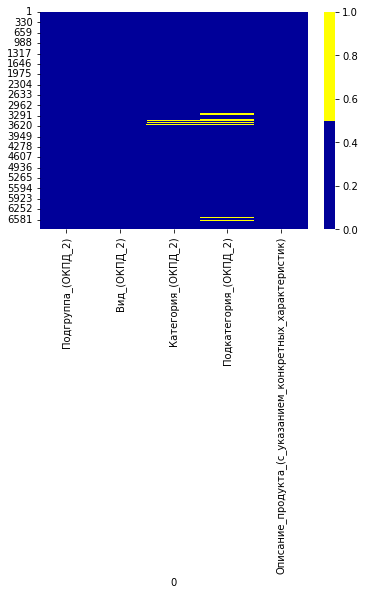

In [ ]:
cols = dfprod.columns[7:12] # первые 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(dfprod[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
dfprod[dfprod['Вид_(ОКПД_2)'].isna()]

0    global_id_(продукта) Компания        Рыночное_наименование_продукта_  \
3508              1106062  1011589  Услуги по проведению ПЦР-исследований   

0                                       Раздел_(ОКПД_2)  \
3508  Раздел Q. Услуги в области здравоохранения и с...   

0                           Класс_(ОКПД_2)  \
3508  86. Услуги в области здравоохранения   

0                                     Подкласс_(ОКПД_2)  \
3508  86.2. Услуги в области медицинской и стоматоло...   

0                                       Группа_(ОКПД_2)  \
3508  86.22. Услуги в области специализированной вра...   

0                                    Подгруппа_(ОКПД_2) Вид_(ОКПД_2)  \
3508  86.22.1. Услуги в области специализированной в...          NaN   

0                                    Категория_(ОКПД_2) Подкатегория_(ОКПД_2)  \
3508  86.22.11.000. Услуги по проведению и расшифров...                   NaN   

0    Описание_продукта_(с_указанием_конкретных_характеристик)  
3508             Услуги по проведению ПЦР-исследований.

In [ ]:
dfprod[dfprod['Категория_(ОКПД_2)'].isna()]

0    global_id_(продукта) Компания  \
3457              1063508  1063505   
3458              1063528  1063525   
3464              1063622  1063619   
3465              1063637  1063634   
3466              1063655  1063652   
...                   ...      ...   
6782              1130047  1063619   
6783              1130048  1063634   
6784              1130049  1063652   
6827              1130092  1064409   
6865              1130130  1126550   

0                       Рыночное_наименование_продукта_  \
3457   Электронный детектор для терагерцового диапазона   
3458  Установка для измерения объёмной активности ра...   
3464                                        Поршень ДВС   
3465    Подводный робототехнический комплекс "ПРОМЕТЕЙ"   
3466                                                Uma   
...                                                 ...   
6782                                        Поршень ДВС   
6783    Подводный робототехнический комплекс "ПРОМЕТЕЙ"   
6784                                                Uma   
6827                                      Прокладки ГБЦ   
6865             Водосливные устройства ВСУ-5А, ВСУ-15А   

0                                       Раздел_(ОКПД_2)  \
3457     Раздел C. Продукция обрабатывающих производств   
3458     Раздел C. Продукция обрабатывающих производств   
3464  Раздел G. Услуги по оптовой и розничной торгов...   
3465         Раздел F. Сооружения и строительные работы   
3466      Раздел J. Услуги в области информации и связи   
...                                                 ...   
6782  Раздел G. Услуги по оптовой и розничной торгов...   
6783         Раздел F. Сооружения и строительные работы   
6784      Раздел J. Услуги в области информации и связи   
6827     Раздел C. Продукция обрабатывающих производств   
6865     Раздел C. Продукция обрабатывающих производств   

0                                        Класс_(ОКПД_2)  \
3457  26. Оборудование компьютерное, электронное и о...   
3458  26. Оборудование компьютерное, электронное и о...   
3464  45. Услуги по оптовой и розничной торговле и у...   
3465  42. Сооружения и строительные работы в области...   
3466     63. Услуги в области информационных технологий   
...                                                 ...   
6782  45. Услуги по оптовой и розничной торговле и у...   
6783  42. Сооружения и строительные работы в области...   
6784     63. Услуги в области информационных технологий   
6827  29. Средства автотранспортные, прицепы и полуп...   
6865                 13. Текстиль и изделия текстильные   

0                                     Подкласс_(ОКПД_2)  \
3457               26.1. Компоненты электронные и платы   
3458  26.5. Оборудование для измерения, испытаний и ...   
3464  45.1. Услуги по торговле автотранспортными сре...   
3465  42.9. Сооружения и строительные работы по стро...   
3466                 63.9. Услуги информационные прочие   
...                                                 ...   
6782  45.1. Услуги по торговле автотранспортными сре...   
6783  42.9. Сооружения и строительные работы по стро...   
6784                 63.9. Услуги информационные прочие   
6827  29.3. Части и принадлежности для автотранспорт...   
6865                   13.9. Изделия текстильные прочие   

0                                       Группа_(ОКПД_2)  \
3457                      26.11. Компоненты электронные   
3458  26.51. Оборудование для измерения, испытаний и...   
3464  45.11. Услуги по торговле легковыми автомобиля...   
3465  42.91. Сооружения водные; работы строительные ...   
3466  63.99. Услуги информационные прочие, не включе...   
...                                                 ...   
6782  45.11. Услуги по торговле легковыми автомобиля...   
6783  42.91. Сооружения водные; работы строительные ...   
6784  63.99. Услуги информационные прочие, не включе...   
6827  29.32. Комплектующие и принадлежности для авто...   
6865  13.96. Изделия текстильные технического назнач...   

In [ ]:
dfprod[dfprod['Подкатегория_(ОКПД_2)'].isna()]

0    global_id_(продукта) Компания  \
3174              1059091  1059088   
3179              1059159  1059156   
3181              1059188  1059185   
3188              1059298  1059295   
3189              1059311  1059308   
...                   ...      ...   
6827              1130092  1064409   
6836              1130101  1126241   
6859              1130124  1126482   
6860              1130125  1126482   
6865              1130130  1126550   

0                       Рыночное_наименование_продукта_  \
3174                                        Pampadu 2.0   
3179                                         Газогидрат   
3181  Разработка отечественной комплексной автоматиз...   
3188  робототехнический комплекс автоматизированное ...   
3189                                        Satelliter™   
...                                                 ...   
6827                                      Прокладки ГБЦ   
6836                                        Satelliter™   
6859  Спринклерные оросители с управляемым пуском и ...   
6860  Инновационная система пожаротушения тонкораспы...   
6865             Водосливные устройства ВСУ-5А, ВСУ-15А   

0                                       Раздел_(ОКПД_2)  \
3174            Раздел K. Услуги финансовые и страховые   
3179  Раздел I. Услуги гостиничного хозяйства и обще...   
3181      Раздел J. Услуги в области информации и связи   
3188     Раздел C. Продукция обрабатывающих производств   
3189  Раздел A. Продукция сельского, лесного и рыбно...   
...                                                 ...   
6827     Раздел C. Продукция обрабатывающих производств   
6836  Раздел A. Продукция сельского, лесного и рыбно...   
6859     Раздел C. Продукция обрабатывающих производств   
6860     Раздел C. Продукция обрабатывающих производств   
6865     Раздел C. Продукция обрабатывающих производств   

0                                        Класс_(ОКПД_2)  \
3174  66. Услуги вспомогательные, связанные с услуга...   
3179                   56. Услуги общественного питания   
3181                            58. Услуги издательские   
3188  28. Машины и оборудование, не включенные в дру...   
3189  01. Продукция и услуги сельского хозяйства и о...   
...                                                 ...   
6827  29. Средства автотранспортные, прицепы и полуп...   
6836  01. Продукция и услуги сельского хозяйства и о...   
6859  26. Оборудование компьютерное, электронное и о...   
6860  26. Оборудование компьютерное, электронное и о...   
6865                 13. Текстиль и изделия текстильные   

0                                     Подкласс_(ОКПД_2)  \
3174  66.2. Услуги вспомогательные в сфере страхован...   
3179                    56.3. Услуги по подаче напитков   
3181   58.2. Услуги по изданию программного обеспечения   
3188  28.9. Оборудование специального назначения прочее   
3189  01.6. Услуги в области растениеводства и живот...   
...                                                 ...   
6827  29.3. Части и принадлежности для автотранспорт...   
6836  01.6. Услуги в области растениеводства и живот...   
6859                26.3. Оборудование коммуникационное   
6860                26.3. Оборудование коммуникационное   
6865                   13.9. Изделия текстильные прочие   

0                                       Группа_(ОКПД_2)  \
3174         66.22. Услуги страховых агентов и брокеров   
3179                   56.30. Услуги по подаче напитков   
3181  58.29. Услуги по изданию прочего программного ...   
3188  28.92. Оборудование для добычи полезных ископа...   
3189  01.61. Услуги, связанные с выращиванием сельск...   
...                                                 ...   
6827  29.32. Комплектующие и принадлежности для авто...   
6836  01.61. Услуги, связанные с выращиванием сельск...   
6859               26.30. Оборудование коммуникационное   
6860               26.30. Оборудование коммуникационное   
6865  13.96. Изделия текстильные технического назнач...   

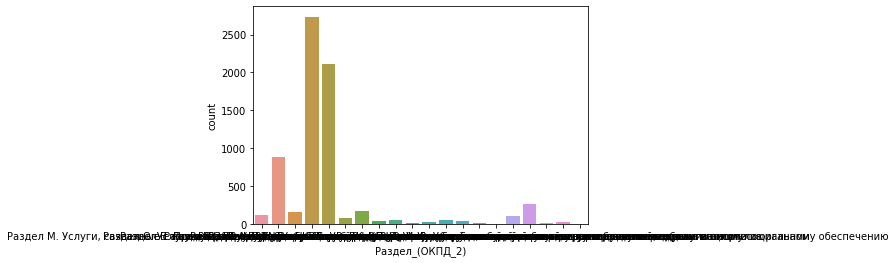

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Раздел_(ОКПД_2)" , data  = dfprod)

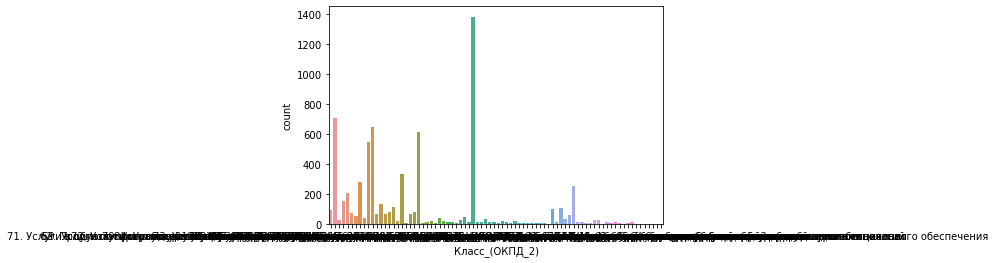

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Класс_(ОКПД_2)" , data  = dfprod)

In [ ]:
dfprod[dfprod['Подкатегория_(ОКПД_2)'].isna()]

0    global_id_(продукта) Компания  \
3174              1059091  1059088   
3179              1059159  1059156   
3181              1059188  1059185   
3188              1059298  1059295   
3189              1059311  1059308   
...                   ...      ...   
6827              1130092  1064409   
6836              1130101  1126241   
6859              1130124  1126482   
6860              1130125  1126482   
6865              1130130  1126550   

0                       Рыночное_наименование_продукта_  \
3174                                        Pampadu 2.0   
3179                                         Газогидрат   
3181  Разработка отечественной комплексной автоматиз...   
3188  робототехнический комплекс автоматизированное ...   
3189                                        Satelliter™   
...                                                 ...   
6827                                      Прокладки ГБЦ   
6836                                        Satelliter™   
6859  Спринклерные оросители с управляемым пуском и ...   
6860  Инновационная система пожаротушения тонкораспы...   
6865             Водосливные устройства ВСУ-5А, ВСУ-15А   

0                                       Раздел_(ОКПД_2)  \
3174            Раздел K. Услуги финансовые и страховые   
3179  Раздел I. Услуги гостиничного хозяйства и обще...   
3181      Раздел J. Услуги в области информации и связи   
3188     Раздел C. Продукция обрабатывающих производств   
3189  Раздел A. Продукция сельского, лесного и рыбно...   
...                                                 ...   
6827     Раздел C. Продукция обрабатывающих производств   
6836  Раздел A. Продукция сельского, лесного и рыбно...   
6859     Раздел C. Продукция обрабатывающих производств   
6860     Раздел C. Продукция обрабатывающих производств   
6865     Раздел C. Продукция обрабатывающих производств   

0                                        Класс_(ОКПД_2)  \
3174  66. Услуги вспомогательные, связанные с услуга...   
3179                   56. Услуги общественного питания   
3181                            58. Услуги издательские   
3188  28. Машины и оборудование, не включенные в дру...   
3189  01. Продукция и услуги сельского хозяйства и о...   
...                                                 ...   
6827  29. Средства автотранспортные, прицепы и полуп...   
6836  01. Продукция и услуги сельского хозяйства и о...   
6859  26. Оборудование компьютерное, электронное и о...   
6860  26. Оборудование компьютерное, электронное и о...   
6865                 13. Текстиль и изделия текстильные   

0                                     Подкласс_(ОКПД_2)  \
3174  66.2. Услуги вспомогательные в сфере страхован...   
3179                    56.3. Услуги по подаче напитков   
3181   58.2. Услуги по изданию программного обеспечения   
3188  28.9. Оборудование специального назначения прочее   
3189  01.6. Услуги в области растениеводства и живот...   
...                                                 ...   
6827  29.3. Части и принадлежности для автотранспорт...   
6836  01.6. Услуги в области растениеводства и живот...   
6859                26.3. Оборудование коммуникационное   
6860                26.3. Оборудование коммуникационное   
6865                   13.9. Изделия текстильные прочие   

0                                       Группа_(ОКПД_2)  \
3174         66.22. Услуги страховых агентов и брокеров   
3179                   56.30. Услуги по подаче напитков   
3181  58.29. Услуги по изданию прочего программного ...   
3188  28.92. Оборудование для добычи полезных ископа...   
3189  01.61. Услуги, связанные с выращиванием сельск...   
...                                                 ...   
6827  29.32. Комплектующие и принадлежности для авто...   
6836  01.61. Услуги, связанные с выращиванием сельск...   
6859               26.30. Оборудование коммуникационное   
6860               26.30. Оборудование коммуникационное   
6865  13.96. Изделия текстильные технического назнач...   

In [ ]:
xlotr = pd.ExcelFile('3. Отрасли.xlsx')

In [ ]:
print(xlprod.sheet_names)

['Sheet0']


In [ ]:
dfotr = xlotr.parse('Sheet0')

In [ ]:
dfotr

global_id  Создаваемые продукты  \
0         830782                830283   
1         830783                830728   
2         830784                812492   
3         830785                830618   
4         830786                830560   
...          ...                   ...   
10581    1114226               1106327   
10582    1114227               1106329   
10583    1114228               1106330   
10584    1114229               1106331   
10585    1114230               1106332   

                                                 Отрасль  \
0               СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
1               СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
2               СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
3               СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
4               СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
...                                                  ...   
10581               ПРОФЕССИОНАЛЬНАЯ ДЕЯТЕЛЬНОСТЬ ПРОЧАЯ   
10582                                     ПРОМЫШЛЕННОСТЬ   
10583  ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...   
10584                                    ЗДРАВООХРАНЕНИЕ   
10585                                     ПРОМЫШЛЕННОСТЬ   

                                              Подотрасль  
0                                         Животноводство  
1                                        Растениеводство  
2                                        Растениеводство  
3                                        Растениеводство  
4                                         Животноводство  
...                                                  ...  
10581                     Прочие профессиональные услуги  
10582                      Производство новых материалов  
10583                                   Прототипирование  
10584  Производство медицинских изделий для диагности...  
10585  Производство электронного и электрического обо...  

[10586 rows x 4 columns]

In [ ]:
dfotr.describe(include=[object])  

Отрасль     Подотрасль
count            10586          10586
unique              20            147
top     ПРОМЫШЛЕННОСТЬ  Прочие услуги
freq              3133            653

In [ ]:
dfotr[(dfotr.Подотрасль=="Прочие услуги")]

global_id  Создаваемые продукты              Отрасль     Подотрасль
589       831569                813131  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
1002      832179                830553  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
1003      832181                830485  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
1191      832436                830655  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
1193      832439                813206  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
...          ...                   ...                  ...            ...
10082    1064332               1064273  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
10087    1064337               1064273  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
10112    1064362               1064273  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
10113    1064363               1064273  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги
10114    1064364               1064273  ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ  Прочие услуги

[653 rows x 4 columns]

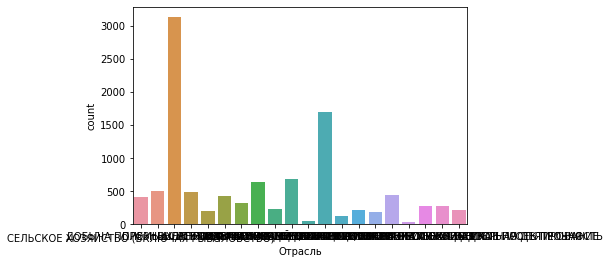

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Отрасль" , data  = dfotr)

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfotr.Отрасль.value_counts()

ПРОМЫШЛЕННОСТЬ                                         3133
ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ                            1701
ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ                                     678
ЗДРАВООХРАНЕНИЕ                                         647
ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ                              503
ЭНЕРГЕТИКА                                              486
ТРАНСПОРТ, ХРАНЕНИЕ И ЛОГИСТИКА                         449
СТРОИТЕЛЬСТВО                                           432
СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)                418
ОБРАЗОВАНИЕ                                             329
ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРОВАНИЕ     278
БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ        270
ФИНАНСОВЫЙ СЕКТОР                                       231
ТОРГОВЛЯ                                                214
ПРОФЕССИОНАЛЬНАЯ ДЕЯТЕЛЬНОСТЬ ПРОЧАЯ                    211
ЖКХ                                                     208
СПОРТ, ТУРИЗМ И СФЕРА ОБСЛУЖИВАНИЯ      

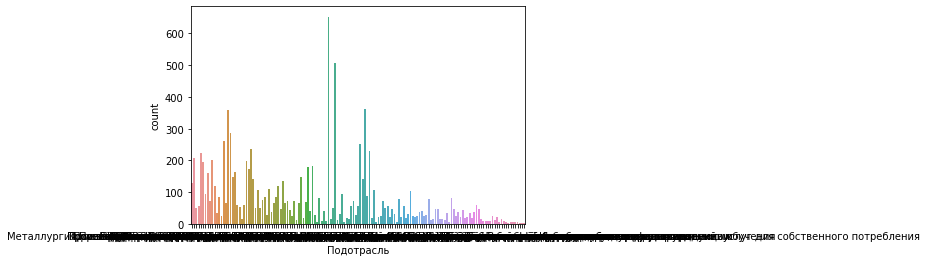

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Подотрасль" , data  = dfotr)

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfotr.Подотрасль.value_counts().head(50)

Прочие услуги                                                                      653
Специализированные информационные системы                                          506
Разработка аппаратно-программных комплексов                                        361
Машиностроение                                                                     358
Производство электронного и электрического оборудования                            287
Металлургия, металлопродукция, производство готовых металлических изделий          260
Рекомендательные системы, персональные помощники и агрегаторы                      252
Химическая промышленность                                                          237
Деятельность по созданию новых информационных технологий                           230
Добыча нефти и природного газа                                                     224
Растениеводство                                                                    206
Автомобильная промышленность               

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfotr.Подотрасль.value_counts().tail(50)

Обеспечение безопасности в чрезвычайных ситуациях                                                                                          24
Создание социальных сетей                                                                                                                  23
Аудит, бухгалтерский учет, налоговое консультирование                                                                                      22
Предоставление услуг в сфере культурно-развлекательного досуга                                                                             21
Разработка и развитие компьютерных и мобильных игр                                                                                         21
Инфраструктура для водного транспорта                                                                                                      21
Техническое регулирование, стандартизация, метрология, аккредитация, каталогизация продукции                                               20
Курьер

In [ ]:
xltech = pd.ExcelFile('4. Технологии.xlsx')

In [ ]:
print(xltech.sheet_names)

['Sheet0']


In [ ]:
dftech = xltech.parse('Sheet0')

In [ ]:
dftech

global_id  Создаваемые продукты                 Технология (1 уровень)  \
0        832680                830397             Сбор информации об объекте   
1        832682                812554             Сбор информации об объекте   
2        832684                813256             Сбор информации об объекте   
3        832687                830563             Сбор информации об объекте   
4        832688                830560             Сбор информации об объекте   
...         ...                   ...                                    ...   
4756    1065426                838945                      Синтез информации   
4757    1065427                838948           Синтез материальных объектов   
4758    1065428                838948                      Синтез информации   
4759    1065429                838949                      Синтез информации   
4760    1065430                838950  Обработка и преобразование информации   

                Технология (2 уровень)  \
0         Методы биоорганической химии   
1         Методы биоорганической химии   
2         Методы биоорганической химии   
3         Методы биоорганической химии   
4        Исследования на живых моделях   
...                                ...   
4756           Искусственный интеллект   
4757              Инженерные комплексы   
4758           Искусственный интеллект   
4759                   Синтез контента   
4760  Технологии цифровой безопасности   

                                 Технология (3 уровень)  
0                               Иммунологические методы  
1                   Технологии секвенирования ДНК и РНК  
2                   Технологии секвенирования ДНК и РНК  
3                   Технологии секвенирования ДНК и РНК  
4     Исследования на живых организмах при экстремал...  
...                                                 ...  
4756                    Технологии поиска и оптимизации  
4757                          Робототехнические решения  
4758  Машинное обучение включая глубокое обучение и ...  
4759                   Синтез образовательного контента  
4760  Технологии сетевой безопасности (Network secur...  

[4761 rows x 5 columns]

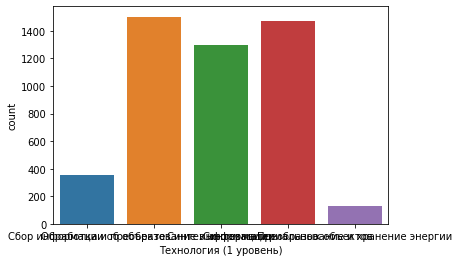

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Технология (1 уровень)" , data  = dftech)

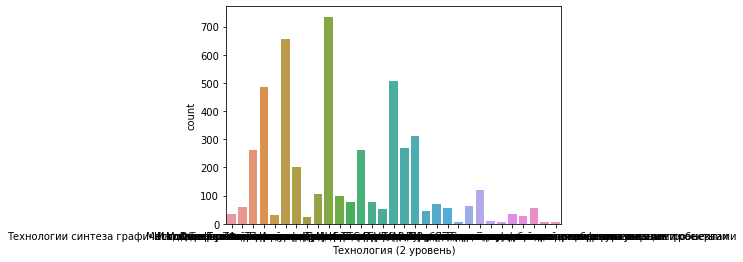

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Технология (2 уровень)" , data  = dftech)

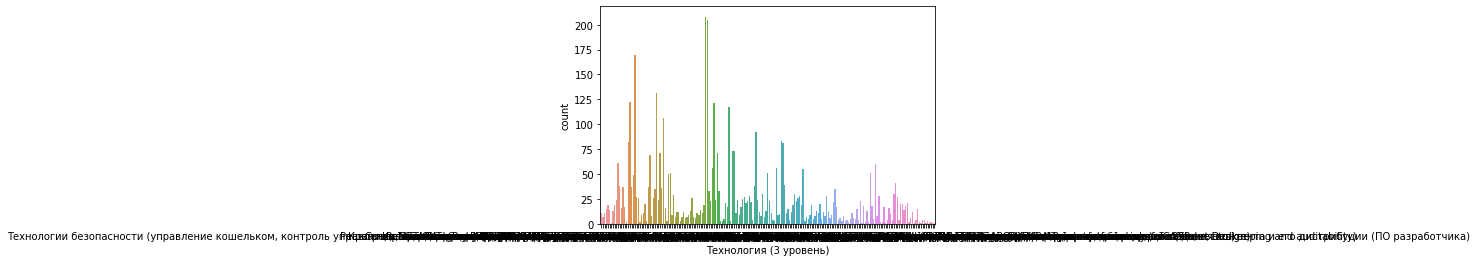

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Технология (3 уровень)" , data  = dftech)

In [ ]:
xlsprotr = pd.ExcelFile('Справочник. Отрасли и подотрасли.xlsx')

In [ ]:
print(xlsprotr.sheet_names)


['2022.04.19. Справочник отраслей']


In [ ]:
dfsprotr = xlsprotr.parse('2022.04.19. Справочник отраслей')

In [ ]:
dfsprotr.columns = dfsprotr.iloc[0]
dfsprotr = dfsprotr.iloc[1:]
dfsprotr

0                                     Отрасль  \
1    СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
2    СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
3    СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
4    СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
5                  ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ   
..                                        ...   
145                       ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ   
146                       ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ   
147                       ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ   
148                       ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ   
149                                       NaN   

0                              Наименование подотрасли  
1                                       Животноводство  
2                                      Растениеводство  
3                            Рыболовство и рыбоводство  
4                          Лесоводство и лесозаготовка  
5                                          Добыча угля  
..                                                 ...  
145  Деятельность домашних хозяйств с наемными рабо...  
146  Предоставление прочих персональных услуг, не в...  
147  Деятельность недифференцированная частных дома...  
148                                      Прочие услуги  
149                                                н/д  

[149 rows x 2 columns]

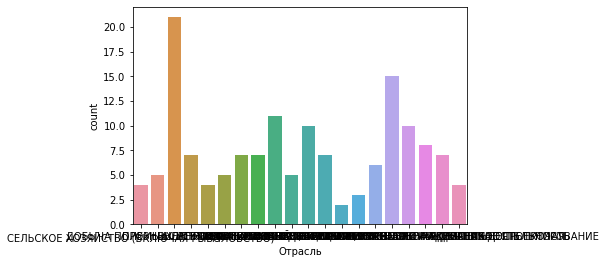

In [ ]:
# Сводка по распределению данных графическое(визуальное)
warnings.simplefilter('ignore')
sns.countplot(x = "Отрасль" , data  = dfsprotr)

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfcom.Отрасль.value_counts().head(50)

ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ                            1237
ПРОМЫШЛЕННОСТЬ                                         1182
ЗДРАВООХРАНЕНИЕ                                         345
ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРОВАНИЕ     237
СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)                117
ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ                                      99
ЭНЕРГЕТИКА                                               96
ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ                               90
ПРОФЕССИОНАЛЬНАЯ ДЕЯТЕЛЬНОСТЬ ПРОЧАЯ                     46
ОБРАЗОВАНИЕ                                              42
БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ         39
ТРАНСПОРТ, ХРАНЕНИЕ И ЛОГИСТИКА                          38
СТРОИТЕЛЬСТВО                                            35
ФИНАНСОВЫЙ СЕКТОР                                        32
ЖКХ                                                      23
ТОРГОВЛЯ                                                 21
СПОРТ, ТУРИЗМ И СФЕРА ОБСЛУЖИВАНИЯ      

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfcom.Подотрасль.value_counts().head(50)

Специализированные информационные системы                                                   402
Разработка аппаратно-программных комплексов                                                 384
Производство электронного и электрического оборудования                                     264
Машиностроение                                                                              219
Деятельность по созданию новых информационных технологий                                    209
Производство новых материалов                                                               148
Инженерно-техническое проектирование                                                        136
Рекомендательные системы, персональные помощники и агрегаторы                               129
Химическая промышленность                                                                   124
Производство медицинских инструментов и оборудования для терапии и реабилитации             124
Прочие услуги                           

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
dfcom.Подотрасль.value_counts().tail(50)

Производство кокса и нефтепродуктов                                                             4
Торговля розничная в торговых объектах                                                          4
Разработка и развитие компьютерных и мобильных игр                                              4
Инженерно-техническое обслуживание и эксплуатация зданий                                        4
Проведение расследований и экспертиза                                                           3
Лесоводство и лесозаготовка                                                                     3
Страхование, перестрахование                                                                    3
Борьба с пожарами                                                                               3
Создание социальных сетей                                                                       3
Туризм                                                                                          3
Добыча металлических

In [ ]:
xlsprtech = pd.ExcelFile('Справочник. Технологии.xlsx')

In [ ]:
print(xlsprtech.sheet_names)

['Технологии']


In [ ]:
dfsprtech = xlsprtech.parse('Технологии')

In [ ]:
dfsprtech.columns = dfsprtech.iloc[0]
dfsprtech = dfsprtech.iloc[1:]
dfsprtech

0    №                          1 уровень     №  \
1    1         Сбор информации об объекте  1.01   
2    1         Сбор информации об объекте  1.01   
3    1         Сбор информации об объекте  1.01   
4    1         Сбор информации об объекте  1.01   
5    1         Сбор информации об объекте  1.01   
..  ..                                ...   ...   
204  5  Преобразование и хранение энергии  5.04   
205  5  Преобразование и хранение энергии  5.04   
206  5  Преобразование и хранение энергии  5.04   
207  5  Преобразование и хранение энергии  5.04   
208  5  Преобразование и хранение энергии  5.04   

0                                            2 уровень        №  \
1                         Методы биоорганической химии  1.01.01   
2                         Методы биоорганической химии  1.01.02   
3                         Методы биоорганической химии  1.01.03   
4                         Методы биоорганической химии  1.01.04   
5                         Методы биоорганической химии  1.01.05   
..                                                 ...      ...   
204  Технологии передачи, распределения и преобразо...  5.04.03   
205  Технологии передачи, распределения и преобразо...  5.04.04   
206  Технологии передачи, распределения и преобразо...  5.04.05   
207  Технологии передачи, распределения и преобразо...  5.04.06   
208  Технологии передачи, распределения и преобразо...  5.04.07   

0           3 уровень (уровень тегирования участников)  \
1                              Иммунологические методы   
2                          Полимеразная цепная реакция   
3                 Технологии протеомики и метаболомики   
4                  Технологии секвенирования ДНК и РНК   
5                         Технологии создания биочипов   
..                                                 ...   
204    Технологии беспроводной передачи электроэнергии   
205  Технологии коммутации и распределения электроэ...   
206  Технологии передачи электроэнергии на постоянн...   
207  Технологии релейной защиты и автоматики при пе...   
208                               Электрические машины   

0                                4 уровень (Подсказки)  NaN  NaN  
1                                                  NaN  NaN  NaN  
2                                                  NaN  NaN  NaN  
3                                                  NaN  NaN  NaN  
4                                                  NaN  NaN  NaN  
5                                                  NaN  NaN  NaN  
..                                                 ...  ...  ...  
204  Технология магнито-резонансной передачи электр...  NaN  NaN  
205  С применением силовых выключателей (масляные, ...  NaN  NaN  
206                                                NaN  NaN  NaN  
207  Устройства релейной защиты и автоматики, в том...  NaN  NaN  
208  Электрогенераторы, магнитогидродинамические ге...  NaN  NaN  

[208 rows x 9 columns]

In [ ]:
dfsprtech['3 уровень (уровень тегирования участников)'].unique()

array(['Иммунологические методы', 'Полимеразная цепная реакция',
       'Технологии протеомики и метаболомики',
       'Технологии секвенирования ДНК и РНК',
       'Технологии создания биочипов',
       'Исследования на живых организмах при экстремальных условиях',
       'Исследования на клеточных культурах',
       'Исследования на модельных животных', 'Микробиологические методы',
       'Инерционные методы регистрации', 'Квантовые сенсоры',
       'Комплексные методы измерения',
       'Методы регистрации ионизирующих и высокоэнергетических излучений',
       'Метрология (калибровка, поверка)',
       'Регистрация и преобразование акустических сигналов',
       'Регистрация и преобразование оптических сигналов',
       'Регистрация и преобразование СВЧ и терагерцового излучения',
       'Технологии диагностики, использующие электрические и магнитные поля',
       'Хемилюминесцентные методы регистрации', 'Фотоника',
       'Электрохимические методы диагностики', 'Сенсорика',
       

In [ ]:
len(dfsprtech['3 уровень (уровень тегирования участников)'].unique())

207

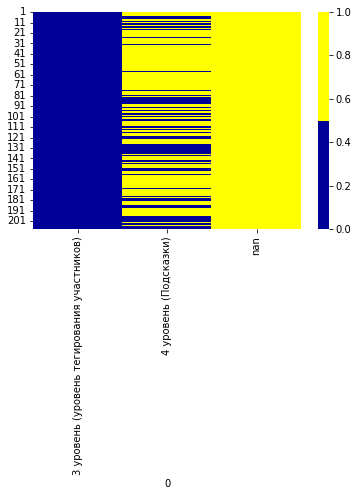

In [ ]:
cols = dfsprtech.columns[5:8] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(dfsprtech[cols].isnull(), cmap=sns.color_palette(colours))

## Загрузка сводной таблицы

In [ ]:
df = pd.read_csv("Merged.csv", encoding='utf8')

In [ ]:
df

Наименование поддержанной компании  \
0                       ООО "АГРОПЛАЗМА"   
1        ООО "ЛАБОРАТОРИЯ НАНОСЕМАНТИКА"   
2        ООО "ЛАБОРАТОРИЯ НАНОСЕМАНТИКА"   
3        ООО "ЛАБОРАТОРИЯ НАНОСЕМАНТИКА"   
4        ООО "ЛАБОРАТОРИЯ НАНОСЕМАНТИКА"   
...                                  ...   
13438               ООО "ИСТИННЫЙ МЕТОД"   
13439               ООО "ИСТИННЫЙ МЕТОД"   
13440               ООО "ИСТИННЫЙ МЕТОД"   
13441               ООО "ИСТИННЫЙ МЕТОД"   
13442                          ООО "ГБЦ"   

                                        Отрасль  \
0      СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)   
1                   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
2                   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
3                   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
4                   ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
...                                         ...   
13438               ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13439               ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13440               ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13441               ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13442                            ПРОМЫШЛЕННОСТЬ   

                                              Подотрасль  \
0                                        Растениеводство   
1      Деятельность по созданию новых информационных ...   
2      Деятельность по созданию новых информационных ...   
3      Деятельность по созданию новых информационных ...   
4      Деятельность по созданию новых информационных ...   
...                                                  ...   
13438          Специализированные информационные системы   
13439          Специализированные информационные системы   
13440          Специализированные информационные системы   
13441          Специализированные информационные системы   
13442                      Производство новых материалов   

                      Технология (1 уровень)  \
0               Синтез материальных объектов   
1                          Синтез информации   
2                          Синтез информации   
3                          Синтез информации   
4                          Синтез информации   
...                                      ...   
13438  Обработка и преобразование информации   
13439  Обработка и преобразование информации   
13440  Обработка и преобразование информации   
13441  Обработка и преобразование информации   
13442           Синтез материальных объектов   

                    Технология (2 уровень)  \
0         Синтез живых организмов и систем   
1                  Искусственный интеллект   
2                  Искусственный интеллект   
3                  Искусственный интеллект   
4                  Искусственный интеллект   
...                                    ...   
13438  Интеллектуальные системы управления   
13439  Интеллектуальные системы управления   
13440  Интеллектуальные системы управления   
13441  Интеллектуальные системы управления   
13442        Материалы с новыми свойствами   

                                  Технология (3 уровень)  \
0                           Технологии селекции растений   
1      Обработка естественных языков (перевод, класси...   
2      Обработка естественных языков (перевод, класси...   
3      Обработка естественных языков (перевод, класси...   
4      Обработка естественных языков (перевод, класси...   
...                                                  ...   
13438  Системы управления жизненным циклом сложных ин...   
13439  Системы управления жизненным циклом сложных ин...   
13440  Системы управления жизненным циклом сложных ин...   
13441  Системы управления жизненным циклом сложных ин...   
13442                         Изменение объемных свойств   

                                               Сайт  \
0                         http://www.agroplazma.com   
1                         https://nanosemantics.ai/   
2                         https://nanosemantics.ai/   
3                         https://nanosemantics.ai/   
4                

In [ ]:
df = df.rename(columns={'Технология (3 уровень)': 'Технология3'})

In [ ]:
df = df.rename(columns={'Раздел (ОКПД 2)': 'РазделОКПД2', 'Класс (ОКПД 2)': 'КлассОКПД2', 'Подкласс (ОКПД 2)': 'ПодклассОКПД2',
       'Группа (ОКПД 2)': 'ГруппаОКПД2', 'Подгруппа (ОКПД 2)': 'ПодгруппаОКПД2', 'Вид (ОКПД 2)': 'ВидОКПД2', 'Категория (ОКПД 2)': 'КатегорияОКПД2', 
       'Подкатегория (ОКПД 2)': 'ПодкатегорияОКПД2'})

In [ ]:
df[(df['Наименование поддержанной компании']	== 'ООО "БАЗИС"')]

Наименование поддержанной компании  \
1744                        ООО "БАЗИС"   
1745                        ООО "БАЗИС"   
1746                        ООО "БАЗИС"   
1747                        ООО "БАЗИС"   
1748                        ООО "БАЗИС"   
1749                        ООО "БАЗИС"   
1750                        ООО "БАЗИС"   
1751                        ООО "БАЗИС"   
1752                        ООО "БАЗИС"   
5181                        ООО "БАЗИС"   
5182                        ООО "БАЗИС"   
5183                        ООО "БАЗИС"   
5184                        ООО "БАЗИС"   
5185                        ООО "БАЗИС"   
5186                        ООО "БАЗИС"   
5187                        ООО "БАЗИС"   
5188                        ООО "БАЗИС"   
5189                        ООО "БАЗИС"   
5190                        ООО "БАЗИС"   
5191                        ООО "БАЗИС"   
5192                        ООО "БАЗИС"   
5193                        ООО "БАЗИС"   
5194                        ООО "БАЗИС"   
5195                        ООО "БАЗИС"   
5196                        ООО "БАЗИС"   
5197                        ООО "БАЗИС"   
5198                        ООО "БАЗИС"   
5199                        ООО "БАЗИС"   
5200                        ООО "БАЗИС"   
5201                        ООО "БАЗИС"   
5202                        ООО "БАЗИС"   
5203                        ООО "БАЗИС"   
5204                        ООО "БАЗИС"   
5205                        ООО "БАЗИС"   
6541                        ООО "БАЗИС"   
6542                        ООО "БАЗИС"   
6543                        ООО "БАЗИС"   
6544                        ООО "БАЗИС"   
6545                        ООО "БАЗИС"   
6546                        ООО "БАЗИС"   
6547                        ООО "БАЗИС"   
6548                        ООО "БАЗИС"   
6585                        ООО "БАЗИС"   

                                               Отрасль  \
1744                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1745                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1746                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1747                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1748                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1749                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1750                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1751                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
1752                       ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
5181                                    ПРОМЫШЛЕННОСТЬ   
5182                                    ПРОМЫШЛЕННОСТЬ   
5183                                    ПРОМЫШЛЕННОСТЬ   
5184                                    ПРОМЫШЛЕННОСТЬ   
5185                                    ПРОМЫШЛЕННОСТЬ   
5186                                    ПРОМЫШЛЕННОСТЬ   
5187                                    ПРОМЫШЛЕННОСТЬ   
5188                                    ПРОМЫШЛЕННОСТЬ   
5189                                    ПРОМЫШЛЕННОСТЬ   
5190                                    ПРОМЫШЛЕННОСТЬ   
5191                                    ПРОМЫШЛЕННОСТЬ   
5192                                    ПРОМЫШЛЕННОСТЬ   
5193                                    ПРОМЫШЛЕННОСТЬ   
5194                                    ПРОМЫШЛЕННОСТЬ   
5195                                    ПРОМЫШЛЕННОСТЬ   
5196                                    ПРОМЫШЛЕННОСТЬ   
5197                                    ПРОМЫШЛЕННОСТЬ   
5198                                    ПРОМЫШЛЕННОСТЬ   
5199                                    ПРОМЫШЛЕННОСТЬ   
5200                                    ПРОМЫШЛЕННОСТЬ   
5201                                    ПРОМЫШЛЕННОСТЬ   
5202                                    ПРОМЫШЛЕННОСТЬ   
5203                                    ПРОМЫШЛЕННОСТЬ   
5204                                    ПРОМЫШЛЕННОСТЬ   
5205                                    ПРОМЫШЛЕННОСТЬ   
6541                                    ПРОМЫШЛЕННОСТЬ   
6542                    

In [ ]:
df.describe(include=[object])  

Наименование поддержанной компании                      Отрасль  \
count                               13443                        13443   
unique                               3117                           20   
top                  ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
freq                                  164                         5936   

                                       Подотрасль  \
count                                       13443   
unique                                        121   
top     Специализированные информационные системы   
freq                                         2037   

                       Технология (1 уровень)   Технология (2 уровень)  \
count                                   13443                    13443   
unique                                      5                       31   
top     Обработка и преобразование информации  Искусственный интеллект   
freq                                     4825                     2445   

                                        Технология3        Сайт  \
count                                         13443       13443   
unique                                          203        2301   
top     Компьютерное зрение и обработка изображений  Не указано   
freq                                            781        2774   

                                        Описание компании  \
count                                               13443   
unique                                               3254   
top     Компания Шерпа Роботикс - разработчик Платформ...   
freq                                                  164   

       Рыночное наименование продукта   \
count                            13443   
unique                            3227   
top                                  -   
freq                               919   

                                          РазделОКПД2  \
count                                           13443   
unique                                             20   
top     Раздел J. Услуги в области информации и связи   
freq                                             5270   

                                               КлассОКПД2  \
count                                               13443   
unique                                                 80   
top     62. Продукты программные и услуги по разработк...   
freq                                                 3303   

                                            ПодклассОКПД2  \
count                                               13443   
unique                                                199   
top     62.0. Продукты программные и услуги по разрабо...   
freq                                                 3303   

                                              ГруппаОКПД2  \
count                                               13443   
unique                                                306   
top     62.01. Продукты программные и услуги по разраб...   
freq                                                 2885   

                                           ПодгруппаОКПД2  \
count                                               13443   
unique                                                496   
top     62.01.1. Услуги по проектированию, разработке ...   
freq                                                 1519   

                                                 ВидОКПД2  \
count                                               13443   
unique                                                697   
top     62.01.11. Услуги по проектированию, разработке...   
freq                                                 1443   

                                           КатегорияОКПД2 ПодкатегорияОКПД2  \
count                                               13426             13218   
unique                                                899               188   
top     62.01.11.000. Услуги по проектированию и разра...       Отсутствует   
freq          

In [ ]:
df[(df['Наименование поддержанной компании']	== 'ООО "ШЕРПА РОБОТИКС"')]

Наименование поддержанной компании                      Отрасль  \
13271               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13272               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13273               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13274               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13275               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
...                                  ...                          ...   
13430               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13431               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13432               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13433               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   
13434               ООО "ШЕРПА РОБОТИКС"  ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ   

                                      Подотрасль Технология (1 уровень)  \
13271  Специализированные информационные системы      Синтез информации   
13272  Специализированные информационные системы      Синтез информации   
13273  Специализированные информационные системы      Синтез информации   
13274  Специализированные информационные системы      Синтез информации   
13275  Специализированные информационные системы      Синтез информации   
...                                          ...                    ...   
13430  Специализированные информационные системы      Синтез информации   
13431  Специализированные информационные системы      Синтез информации   
13432  Специализированные информационные системы      Синтез информации   
13433  Специализированные информационные системы      Синтез информации   
13434  Специализированные информационные системы      Синтез информации   

        Технология (2 уровень)  \
13271  Искусственный интеллект   
13272  Искусственный интеллект   
13273  Искусственный интеллект   
13274  Искусственный интеллект   
13275  Искусственный интеллект   
...                        ...   
13430  Искусственный интеллект   
13431  Искусственный интеллект   
13432  Искусственный интеллект   
13433  Искусственный интеллект   
13434  Искусственный интеллект   

                                             Технология3  \
13271  Экспертные системы на базе искусственного инте...   
13272  Экспертные системы на базе искусственного инте...   
13273  Экспертные системы на базе искусственного инте...   
13274  Экспертные системы на базе искусственного инте...   
13275  Экспертные системы на базе искусственного инте...   
...                                                  ...   
13430  Экспертные системы на базе искусственного инте...   
13431  Экспертные системы на базе искусственного инте...   
13432  Экспертные системы на базе искусственного инте...   
13433  Экспертные системы на базе искусственного инте...   
13434  Экспертные системы на базе искусственного инте...   

                        Сайт  \
13271  https://sherparpa.ru/   
13272  https://sherparpa.ru/   
13273  https://sherparpa.ru/   
13274  https://sherparpa.ru/   
13275  https://sherparpa.ru/   
...                      ...   
13430  https://sherparpa.ru/   
13431  https://sherparpa.ru/   
13432  https://sherparpa.ru/   
13433  https://sherparpa.ru/   
13434  https://sherparpa.ru/   

                                       Описание компании  \
13271  Компания Шерпа Роботикс - разработчик Платформ...   
13272  Компания Шерпа Роботикс - разработчик Платформ...   
13273  Компания Шерпа Роботикс - разработчик Платформ...   
13274  Компания Шерпа Роботикс - разработчик Платформ...   
13275  Компания Шерпа Роботикс - разработчик Платформ...   
...                                                  ...   
13430  Компания Шерпа Роботикс - разработчик Платформ...   
13431  Компания Шерпа Роботикс - разработчик Платформ...   
13432  Компания Шерпа Роботикс - разработчик Платформ...   
13433  Компания Шерпа Роботикс - разработчик Платформ...   
13434  Компания Шерпа Роботикс - разработчик Платформ

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
df['Наименование поддержанной компании'].value_counts().head(50)

ООО "ШЕРПА РОБОТИКС"                      164
ООО "ИНФТЕХ"                              125
ООО "СРПП"                                119
ООО "БЭТТЕРИЛАБ"                          110
ООО "ДОКЗИЛЛА"                             86
ООО "АВ СОФТ"                              77
ООО "НЕЙРОМЕД"                             75
ООО "НЕЙРОСИВИ"                            51
ООО "ИНТЕЛЛЕКТА"                           48
ООО "КЛЕВЕРЕНС СОФТ"                       46
ООО "ИНЖИНИРИНГОВЫЙ ЦЕНТР "РУСЭЛПРОМ"      45
ООО "ХАЙБРА"                               44
ООО "БАЗИС"                                43
ООО "КОЛЛХЕЛПЕР"                           43
ООО "КОНТИНЕНТ-ТАУ"                        41
ООО "ЮРРОБОТ"                              40
ООО "ЦПР РТСОФТ"                           40
ООО "Р&Д"                                  40
ООО "НЕ ТЕРЯЙСЯ"                           39
ООО "НПО ДЕЛЬТА"                           36
ООО «ОПТИМЕТРИК»                           36
ООО "НПО ГЕЛАР"                   

In [ ]:
# Сводка по распределению данных по каждой категории, здесь видим почти  кратное превышение среднего 
df['Наименование поддержанной компании'].value_counts().head(50)

ООО "ШЕРПА РОБОТИКС"                      164
ООО "ИНФТЕХ"                              125
ООО "СРПП"                                119
ООО "БЭТТЕРИЛАБ"                          110
ООО "ДОКЗИЛЛА"                             86
ООО "АВ СОФТ"                              77
ООО "НЕЙРОМЕД"                             75
ООО "НЕЙРОСИВИ"                            51
ООО "ИНТЕЛЛЕКТА"                           48
ООО "КЛЕВЕРЕНС СОФТ"                       46
ООО "ИНЖИНИРИНГОВЫЙ ЦЕНТР "РУСЭЛПРОМ"      45
ООО "ХАЙБРА"                               44
ООО "БАЗИС"                                43
ООО "КОЛЛХЕЛПЕР"                           43
ООО "КОНТИНЕНТ-ТАУ"                        41
ООО "ЮРРОБОТ"                              40
ООО "ЦПР РТСОФТ"                           40
ООО "Р&Д"                                  40
ООО "НЕ ТЕРЯЙСЯ"                           39
ООО "НПО ДЕЛЬТА"                           36
ООО «ОПТИМЕТРИК»                           36
ООО "НПО ГЕЛАР"                   

In [ ]:
# Пример данных из таблицы
print(df.values[0])

['ООО "АГРОПЛАЗМА"' 'СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО)'
 'Растениеводство' 'Синтез материальных объектов'
 'Синтез живых организмов и систем' 'Технологии селекции растений'
 'http://www.agroplazma.com'
 'ООО «Агроплазма» является оригинатором и патентообладателем, занимается производством и продажей семянсобственных сортов сельскохозяйственных культур. Компания «Агроплазма» – первая российская компания, которая на практике осуществляет селекцию сельскохозяйственных растений, связывая полезные признаки (скорость созревания, устойчивость к заболеваниям и др.) с кодирующими генами, комбинируя и отслеживая эти гены в ряду поколений методами молекулярного маркирования (MAS, маркер-опосредованная селе'
 812529 784577 'Семена подсолнечника'
 'Раздел A. Продукция сельского, лесного и рыбного хозяйства'
 '01. Продукция и услуги сельского хозяйства и охоты'
 '01.1 Культуры однолетние'
 '01.11.\xa0Культуры зерновые (кроме риса), зернобобовые, семена масличных культур'
 '01.11.9 Семена льна

## ** Модель Подотрасль



In [ ]:
# Функция вывода сводки по распределению данных
def data_summary(df, Подотрасль):
    for cls in Подотрасль:
        print(f'Количество записей класса {cls}: {df[df.Подотрасль == cls].shape[0]}')    

In [ ]:
# Сводка по распределению данных
data_summary(df, df.Подотрасль.unique())

Количество записей класса Растениеводство: 92
Количество записей класса Деятельность по созданию новых информационных технологий: 1103
Количество записей класса Металлургия, металлопродукция, производство готовых металлических изделий: 213
Количество записей класса Разработка аппаратно-программных комплексов: 1690
Количество записей класса Специализированные информационные системы: 2037
Количество записей класса Системы охраны и обеспечения безопасности: 39
Количество записей класса Техническое создание и предоставление доступа к базам данных, в том числе распределенным : 45
Количество записей класса Инженерно-техническое проектирование: 512
Количество записей класса Добыча нефти и природного газа: 132
Количество записей класса Заказные исследования и разработки, государственное управление исследованиями: 228
Количество записей класса Альтернативная энергетика: 57
Количество записей класса Химическая промышленность: 405
Количество записей класса Производство новых материалов: 320
Колич

In [ ]:
# Задание параметров преобразования
VOCAB_SIZE       = 30000                  # Объем словаря для токенизатора
TRAIN_TEST_RATIO = 0.4                    # Доля проверочной выборки в основном наборе

In [ ]:
# Назначение интервала допустимого количества текстов по классу
text_count_interval = [7, 400]

# Фильтрация данных - отбрасываются все данные без категории
# и все классы объемом менее нижней границы разрешенного интервала
class_to_drop = ['нет данных']
for cls in df.Подотрасль.unique():
    if df[df.Подотрасль == cls].shape[0] < text_count_interval[0]:
        class_to_drop.append(cls)

print(f'Удаляются классы: {class_to_drop}')

del_mask = df.Подотрасль.isin(class_to_drop)
df = df[~del_mask]

# По всем оставшимся классам количество примеров ограничивается не более
# верхней границы разрешенного интервала
for cls in df.Подотрасль.unique():
    df = df.drop(df[df.Подотрасль == cls].index[text_count_interval[1]:])

Удаляются классы: ['нет данных', 'Страхование, перестрахование', 'Складирование и хранение, кроме ядерных материалов, радиоактивных веществ, зерна', 'Инфраструктура для железнодорожного транспорта', 'Теле- и радиовещание', 'Торговля розничная по почте или Интернет', 'Лесоводство и лесозаготовка', 'Создание социальных сетей', 'Деятельность в области спорта', 'Предоставление временного проживания', 'Обеспечение безопасности в чрезвычайных ситуациях', 'Проведение расследований и экспертиза', 'Деятельность поисковых и аварийно-спасательных служб', 'Транспортировка по трубопроводам']


In [ ]:
# Извлечение всех записей-текстов обращений и их меток классов
text_data = df['Описание продукта (с указанием конкретных характеристик)'].tolist()
class_data = df.Подотрасль.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 41829
Список классов: ['Авиакосмическая промышленность' 'Авиаперевозки'
 'Автомобильная промышленность' 'Альтернативная энергетика'
 'Аренда машин и оборудования' 'Атомная энергетика'
 'Аудит, бухгалтерский учет, налоговое консультирование'
 'Банковская деятельность' 'Безопасность дорожного движения'
 'Беспроводная связь' 'Борьба с пожарами'
 'Высшее и послевузовское образование' 'Геологоразведочные работы'
 'Гидрометеорология' 'Гидроэнергетика'
 'Деревообработка, производство бумаги'
 'Деятельность в области отдыха и развлечений'
 'Деятельность по созданию новых информационных технологий'
 'Добыча металлических руд' 'Добыча нефти и природного газа'
 'Добыча прочих полезных ископаемых' 'Животноводство'
 'Заказные исследования и разработки, государственное управление исследованиями'
 'Инженерно-техническое обслуживание и эксплуатация зданий'
 'Инженерно-техническое проектирование'
 'Инженерные изыскания и картография' 'Инфраструктура для автотранспорта'
 'Инфраструктура 

In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape) 
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape) 
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(8385,)
[1, 5291, 21905, 6, 1, 3458, 21906, 2, 7527, 1, 13, 2182, 199, 195, 1, 6045, 3, 21, 36, 871]
(8385, 30000)
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(8385, 90)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, 
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)

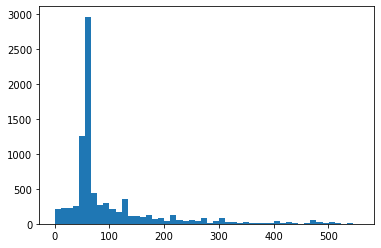

In [ ]:
# Построение гистограммы распределения длин текстов основного набора
seq_len = [len(x) for x in x_data]
plt.hist(seq_len, 50)
plt.show()

In [ ]:
data_summary(df, df.Подотрасль.unique())

Количество записей класса Растениеводство: 92
Количество записей класса Деятельность по созданию новых информационных технологий: 400
Количество записей класса Металлургия, металлопродукция, производство готовых металлических изделий: 213
Количество записей класса Разработка аппаратно-программных комплексов: 400
Количество записей класса Специализированные информационные системы: 400
Количество записей класса Системы охраны и обеспечения безопасности: 39
Количество записей класса Техническое создание и предоставление доступа к базам данных, в том числе распределенным : 45
Количество записей класса Инженерно-техническое проектирование: 400
Количество записей класса Добыча нефти и природного газа: 132
Количество записей класса Заказные исследования и разработки, государственное управление исследованиями: 228
Количество записей класса Альтернативная энергетика: 57
Количество записей класса Химическая промышленность: 400
Количество записей класса Производство новых материалов: 320
Количест

In [ ]:
# Извлечение всех записей-текстов обращений и их меток классов
text_data = df['Описание продукта (с указанием конкретных характеристик)'].tolist()
class_data = df.Подотрасль.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 41829
Список классов: ['Авиакосмическая промышленность' 'Авиаперевозки'
 'Автомобильная промышленность' 'Альтернативная энергетика'
 'Аренда машин и оборудования' 'Атомная энергетика'
 'Аудит, бухгалтерский учет, налоговое консультирование'
 'Банковская деятельность' 'Безопасность дорожного движения'
 'Беспроводная связь' 'Борьба с пожарами'
 'Высшее и послевузовское образование' 'Геологоразведочные работы'
 'Гидрометеорология' 'Гидроэнергетика'
 'Деревообработка, производство бумаги'
 'Деятельность в области отдыха и развлечений'
 'Деятельность по созданию новых информационных технологий'
 'Добыча металлических руд' 'Добыча нефти и природного газа'
 'Добыча прочих полезных ископаемых' 'Животноводство'
 'Заказные исследования и разработки, государственное управление исследованиями'
 'Инженерно-техническое обслуживание и эксплуатация зданий'
 'Инженерно-техническое проектирование'
 'Инженерные изыскания и картография' 'Инфраструктура для автотранспорта'
 'Инфраструктура 

In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape) 
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape) 
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(8385,)
[1, 5291, 21905, 6, 1, 3458, 21906, 2, 7527, 1, 13, 2182, 199, 195, 1, 6045, 3, 21, 36, 871]
(8385, 30000)
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(8385, 90)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(x_data))),
                                       stratify=y_data,
                                       test_size=TRAIN_TEST_RATIO)

# Разделение в соответствии с полученными индексами
x_train, x_test = x_data[idx_train], x_data[idx_test]
x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
y_train, y_test = y_data[idx_train], y_data[idx_test]

# Проверка результата
print(x_train.shape, x_test.shape)
print(x_train_01.shape, x_test_01.shape)
print(y_train.shape, y_test.shape)

(5031,) (3354,)
(5031, 30000) (3354, 30000)
(5031, 90) (3354, 90)


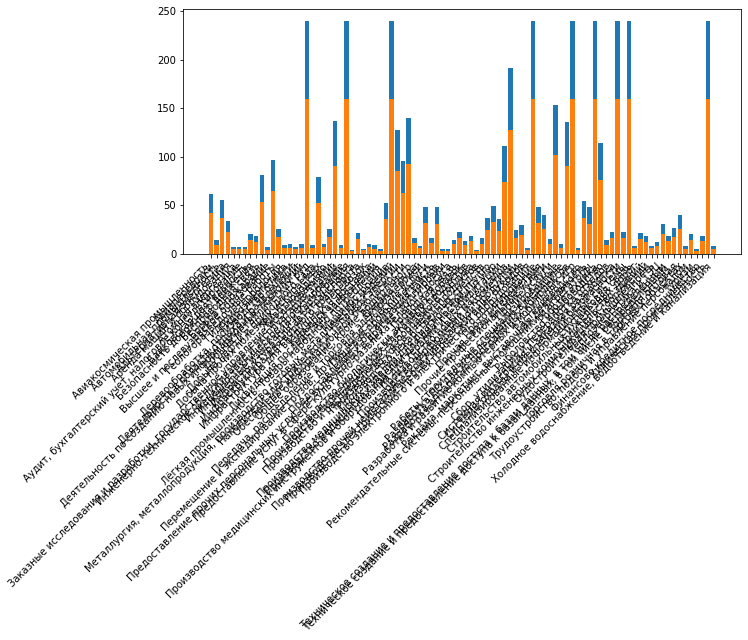

In [ ]:
# Проверка сбалансированности выборок по классам
fig = plt.figure(figsize=(10, 5))
c_train = np.bincount(np.argmax(y_train, axis=1))
c_test = np.bincount(np.argmax(y_test, axis=1))
plt.bar(CLASS_LIST, c_train)
plt.bar(CLASS_LIST, c_test)
fig.autofmt_xdate(rotation=45)
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3000100   
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 90)               

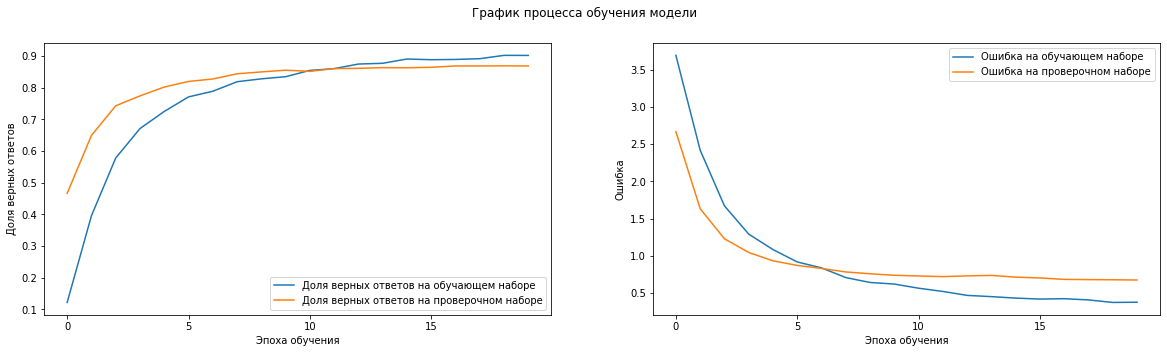

105/105 [==============================] - 0s 3ms/step


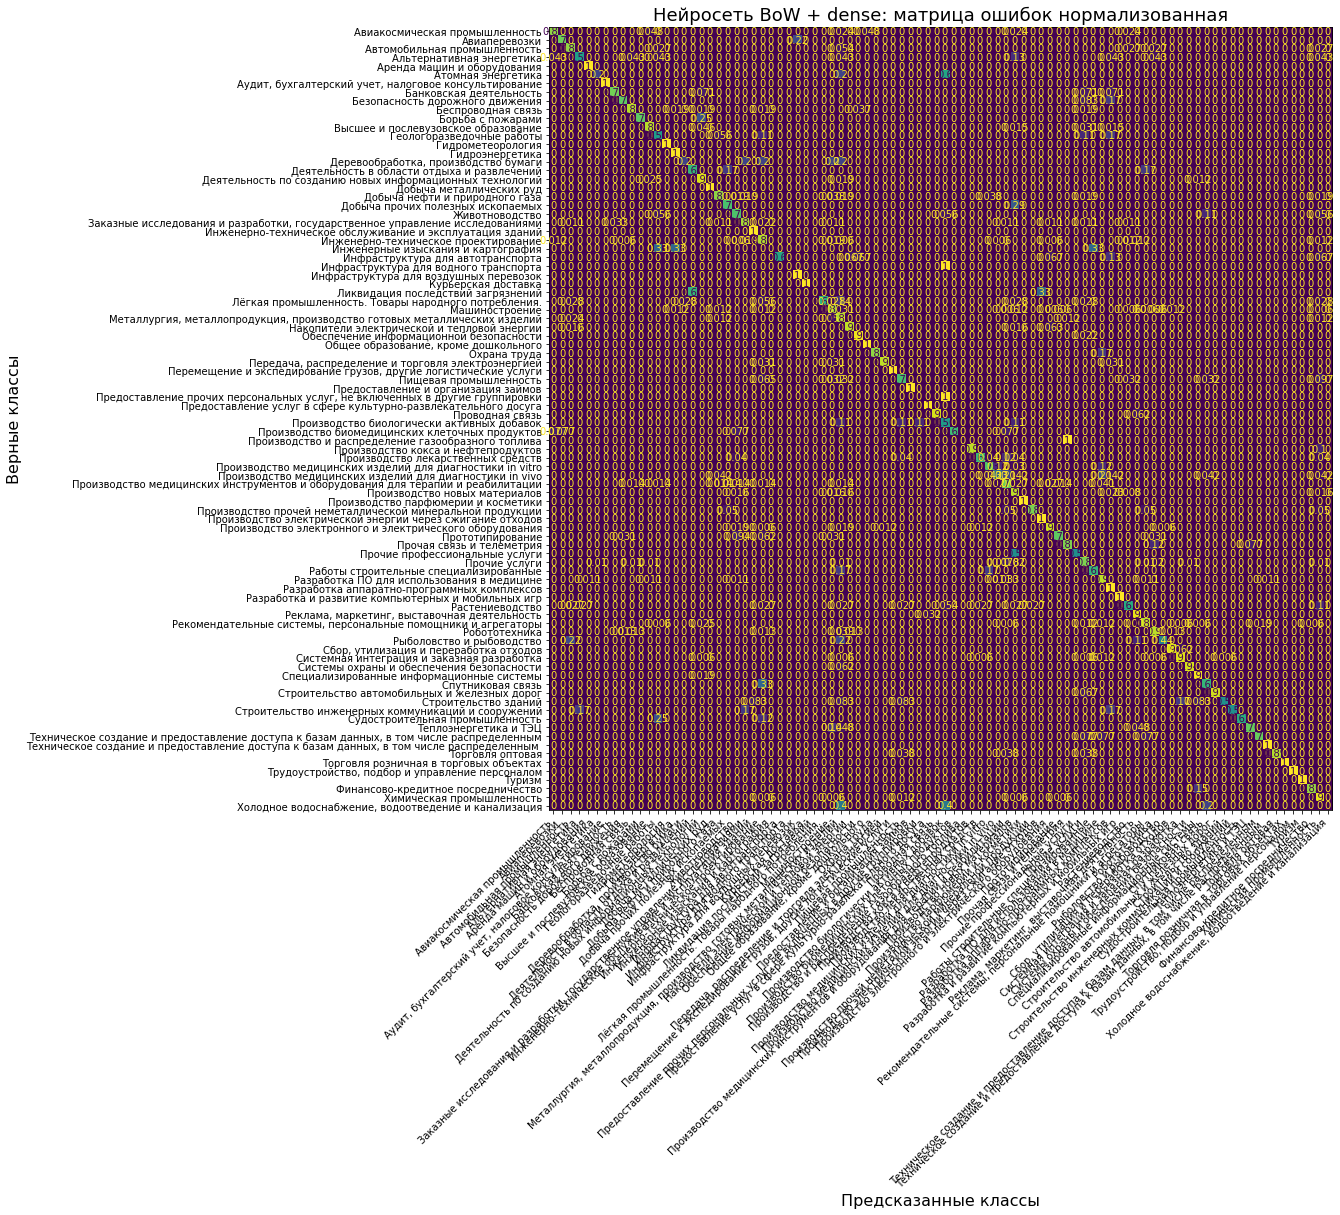

----------------------------------------------------------------------------------------------------
Нейросеть: BoW + dense
Класс: Авиакосмическая промышленность  83% сеть отнесла к классу Авиакосмическая промышленность - ВЕРНО :-)
Класс: Авиаперевозки         78% сеть отнесла к классу Авиаперевозки        - ВЕРНО :-)
Класс: Автомобильная промышленность  84% сеть отнесла к классу Автомобильная промышленность - ВЕРНО :-)
Класс: Альтернативная энергетика  56% сеть отнесла к классу Альтернативная энергетика - ВЕРНО :-)
Класс: Аренда машин и оборудования 100% сеть отнесла к классу Аренда машин и оборудования - ВЕРНО :-)
Класс: Атомная энергетика    60% сеть отнесла к классу Производство биологически активных добавок - НЕВЕРНО :-(
Класс: Аудит, бухгалтерский учет, налоговое консультирование 100% сеть отнесла к классу Аудит, бухгалтерский учет, налоговое консультирование - ВЕРНО :-)
Класс: Банковская деятельность  79% сеть отнесла к классу Банковская деятельность - ВЕРНО :-)
Класс: Безопасно

In [ ]:
# Последовательная модель
model_text_bow_dense = Sequential()
# Входной полносвязный слой
model_text_bow_dense.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Второй полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Третий полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Выходной полносвязный слой
model_text_bow_dense.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_dense,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='BoW + dense')

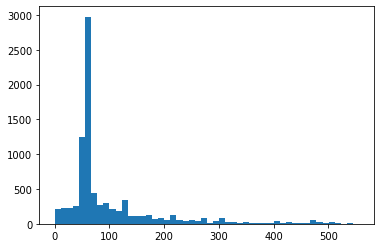

In [ ]:
# Построение гистограммы распределения длин текстов в словах основного набора
seq_len = [len(x) for x in x_data]
plt.hist(seq_len, 50)
plt.show()

In [ ]:
# Снижение размерности входных данных:
# ограничение длины последовательностей до разумного предела
seq_max_len = 200
x_train_clip = pad_sequences(x_train, maxlen=seq_max_len)
x_test_clip = pad_sequences(x_test, maxlen=seq_max_len)

# Проверка формы результата
print(x_train_clip.shape, x_test_clip.shape)

(5087, 200) (3392, 200)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           1500000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 50)          0         
 ropout1D)                                                       
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 batch_normalization (BatchN  (None, 10000)            40000     
 ormalization)                                                   
                                                                 
 dense_8 (Dense)             (None, 64)                640064    
                                                                 
 dropout_6 (Dropout)         (None, 64)               

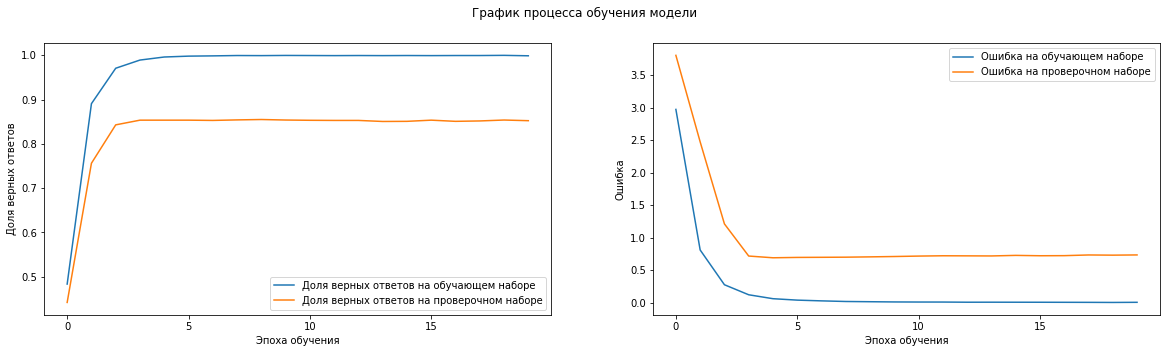

106/106 [==============================] - 1s 4ms/step


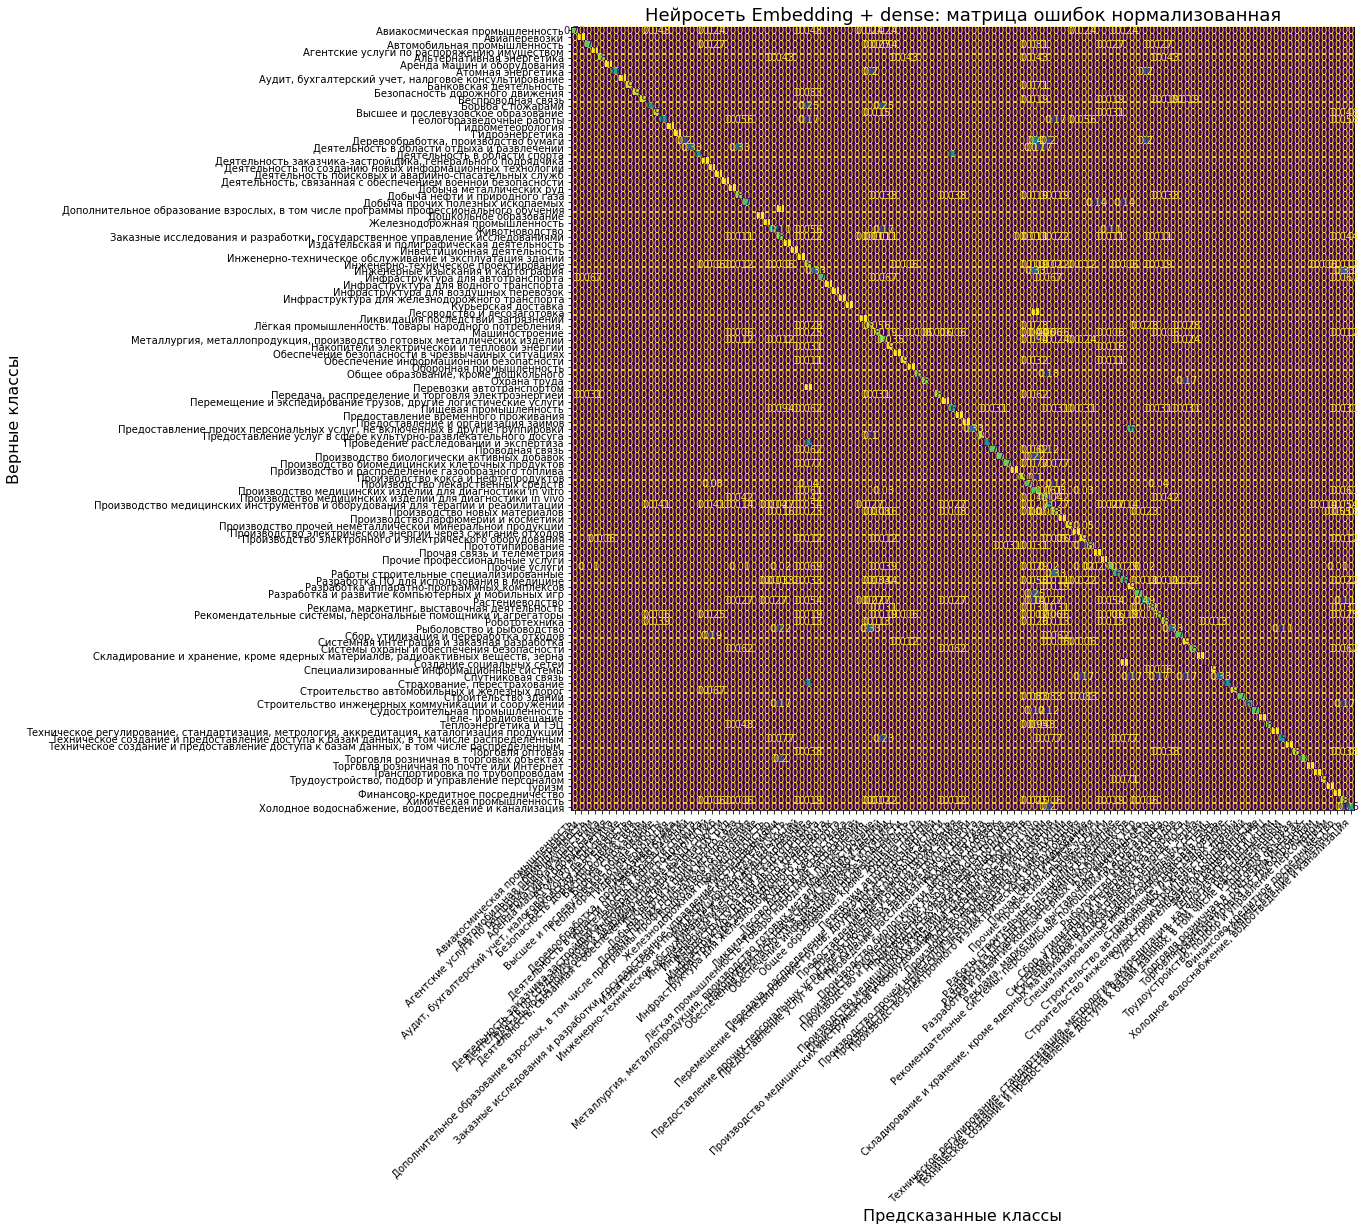

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding + dense
Класс: Авиакосмическая промышленность  79% сеть отнесла к классу Авиакосмическая промышленность - ВЕРНО :-)
Класс: Авиаперевозки        100% сеть отнесла к классу Авиаперевозки        - ВЕРНО :-)
Класс: Автомобильная промышленность  76% сеть отнесла к классу Автомобильная промышленность - ВЕРНО :-)
Класс: Агентские услуги по распоряжению имуществом 100% сеть отнесла к классу Агентские услуги по распоряжению имуществом - ВЕРНО :-)
Класс: Альтернативная энергетика  83% сеть отнесла к классу Альтернативная энергетика - ВЕРНО :-)
Класс: Аренда машин и оборудования 100% сеть отнесла к классу Аренда машин и оборудования - ВЕРНО :-)
Класс: Атомная энергетика    60% сеть отнесла к классу Атомная энергетика   - ВЕРНО :-)
Класс: Аудит, бухгалтерский учет, налоговое консультирование 100% сеть отнесла к классу Аудит, бухгалтерский учет, налоговое консультирование - ВЕРН

In [ ]:
# Последовательная модель
model_text_emb_dense = Sequential()
# Cлой эмбеддингов
model_text_emb_dense.add(Embedding(VOCAB_SIZE, 50, input_length=seq_max_len))
# Слой регуляризации Dropout
model_text_emb_dense.add(SpatialDropout1D(0.2))
# Cлой преобразования многомерных данных в одномерные
model_text_emb_dense.add(Flatten())
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Полносвязный слой
model_text_emb_dense.add(Dense(64, activation="relu"))
# Слой регуляризации Dropout
model_text_emb_dense.add(Dropout(0.2))
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Выходной полносвязный слой
model_text_emb_dense.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_text_emb_dense,
                         x_train_clip, y_train,
                         x_test_clip, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='Embedding + dense')

## **Модель технология**

In [ ]:
# Функция вывода сводки по распределению данных
def data_summary(df, Технология3):
    for cls in Технология3:
        print(f'Количество записей класса {cls}: {df[df.Технология3 == cls].shape[0]}')    

In [ ]:
# Сводка по распределению данных
data_summary(df, df.Технология3.unique())

Количество записей класса Технологии селекции растений: 7
Количество записей класса Обработка естественных языков (перевод, классификация, кластеризация и другое): 30
Количество записей класса Технологии сварки и пайки: 94
Количество записей класса Интерфейсы обмена большими данными: 128
Количество записей класса Синтез образовательного контента: 53
Количество записей класса Статистическая обработка данных: 144
Количество записей класса Регистрация и преобразование акустических сигналов: 45
Количество записей класса Моделирование химических процессов: 6
Количество записей класса Системы медицинской диагностики, лечения и реабилитации, включая телемедицинские системы: 72
Количество записей класса Технологии переработки неорганического сырья и отходов: 49
Количество записей класса Процессы органического синтеза: 26
Количество записей класса Новые технологии сепарации веществ и фракций, включая газо- и водоочистку: 27
Количество записей класса Интегральные фотонные схемы: 3
Количество зап

In [ ]:
# Задание параметров преобразования
VOCAB_SIZE       = 30000                  # Объем словаря для токенизатора
TRAIN_TEST_RATIO = 0.4                    # Доля проверочной выборки в основном наборе

In [ ]:
# Извлечение всех записей-текстов обращений и их меток классов
text_data = df['Описание продукта (с указанием конкретных характеристик)'].tolist()
class_data = df.Технология3.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 37438
Список классов: ['Аддитивные технологии' 'Акустомеханические воздействия'
 'Аппаратно-программные комплексы для интеллектуальных электрических сетей (smart grid, microgrid)'
 'Биоинформатика' 'Биотехнологические процессы' 'Биотехнология вирусов'
 'Биотехнология клеточных культур' 'Биотехнология микроорганизмов'
 'Биотехнология растений' 'Биохимическое воздействие'
 'Вакуумная, компрессорная техника и пневмосистемы'
 'Воздействие ионизирующим излучением'
 'Генераторы плазмы и системы на их основе' 'Генная инженерия'
 'Геоданные и геоинформационные технологии'
 'Гидравлические машины, гидропневмоагрегаты' 'Граничные вычисления'
 'Детонационные методы обработки материалов'
 'Другие технологии накопления энергии'
 'Защита каналов передачи информации, криптография (Cryptography)'
 'Зеленая химия' 'Игровой искусственный интеллект (стратегия, тактика)'
 'Изменение объемных свойств' 'Изменение объемных свойств '
 'Изменение поверхностных свойств' 'Изменение поверхностных 

In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape) 
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape) 
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(7230,)
[28046, 4616, 19593, 6, 28047, 3051, 19594, 2, 7703, 28048, 13, 2025, 213, 180, 28049, 5533, 3, 21, 37, 822]
(7230, 30000)
[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(7230, 190)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, 
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)

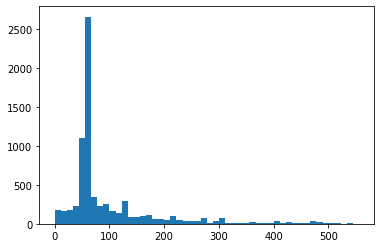

In [ ]:
# Построение гистограммы распределения длин текстов основного набора
seq_len = [len(x) for x in x_data]
plt.hist(seq_len, 50)
plt.show()

In [ ]:
# Назначение интервала допустимого количества текстов по классу
text_count_interval = [5, 200]

# Фильтрация данных - отбрасываются все данные без категории
# и все классы объемом менее нижней границы разрешенного интервала
# class_to_drop = ['нет данных']
for cls in df.Технология3.unique():
    if df[df.Технология3 == cls].shape[0] < text_count_interval[0]:
        class_to_drop.append(cls)

print(f'Удаляются классы: {class_to_drop}')

del_mask = df.Технология3.isin(class_to_drop)
df = df[~del_mask]

# По всем оставшимся классам количество примеров ограничивается не более
# верхней границы разрешенного интервала
for cls in df.Технология3.unique():
    df = df.drop(df[df.Технология3 == cls].index[text_count_interval[1]:])

Удаляются классы: ['нет данных', 'Системы охраны и обеспечения безопасности', 'Техническое создание и предоставление доступа к базам данных, в том числе распределенным ', 'Спутниковая связь', 'Охрана труда', 'Животноводство', 'Производство парфюмерии и косметики', 'Проводная связь', 'Безопасность дорожного движения', 'Курьерская доставка', 'Предоставление услуг в сфере культурно-развлекательного досуга', 'Производство биологически активных добавок', 'Финансово-кредитное посредничество', 'Производство биомедицинских клеточных продуктов', 'Производство кокса и нефтепродуктов', 'Страхование, перестрахование', 'Аудит, бухгалтерский учет, налоговое консультирование', 'Общее образование, кроме дошкольного', 'Сбор, утилизация и переработка отходов', 'Строительство зданий', 'Добыча металлических руд', 'Инженерно-техническое обслуживание и эксплуатация зданий', 'Торговля розничная в торговых объектах', 'Геологоразведочные работы', 'Разработка и развитие компьютерных и мобильных игр', 'Инфрастру

In [ ]:
data_summary(df, df.Подотрасль.unique())

Количество записей класса Растениеводство: 0
Количество записей класса Деятельность по созданию новых информационных технологий: 0
Количество записей класса Металлургия, металлопродукция, производство готовых металлических изделий: 0
Количество записей класса Разработка аппаратно-программных комплексов: 0
Количество записей класса Специализированные информационные системы: 0
Количество записей класса Инженерно-техническое проектирование: 0
Количество записей класса Добыча нефти и природного газа: 0
Количество записей класса Заказные исследования и разработки, государственное управление исследованиями: 0
Количество записей класса Альтернативная энергетика: 0
Количество записей класса Химическая промышленность: 0
Количество записей класса Производство новых материалов: 0
Количество записей класса Рекомендательные системы, персональные помощники и агрегаторы: 0
Количество записей класса Машиностроение: 0
Количество записей класса Производство лекарственных средств: 0
Количество записей кл

In [ ]:
# Извлечение всех записей-текстов обращений и их меток классов
text_data = df['Описание продукта (с указанием конкретных характеристик)'].tolist()
class_data = df.Подотрасль.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 35702
Список классов: ['Авиакосмическая промышленность' 'Автомобильная промышленность'
 'Альтернативная энергетика' 'Беспроводная связь'
 'Высшее и послевузовское образование'
 'Деятельность по созданию новых информационных технологий'
 'Добыча нефти и природного газа'
 'Заказные исследования и разработки, государственное управление исследованиями'
 'Инженерно-техническое проектирование'
 'Лёгкая промышленность. Товары народного потребления.' 'Машиностроение'
 'Металлургия, металлопродукция, производство готовых металлических изделий'
 'Накопители электрической и тепловой энергии'
 'Обеспечение информационной безопасности'
 'Передача, распределение и торговля электроэнергией'
 'Пищевая промышленность' 'Производство лекарственных средств'
 'Производство медицинских изделий для диагностики in vitro'
 'Производство медицинских изделий для диагностики in vivo'
 'Производство медицинских инструментов и оборудования для терапии и реабилитации'
 'Производство новых материалов'

In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape) 
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape) 
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(6834,)
[26777, 4386, 18726, 6, 26778, 2873, 18727, 2, 7351, 26779, 13, 1918, 195, 214, 26780, 5948, 3, 19, 35, 750]
(6834, 30000)
[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
(6834, 37)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(x_data))),
                                       stratify=y_data,
                                       test_size=TRAIN_TEST_RATIO)

# Разделение в соответствии с полученными индексами
x_train, x_test = x_data[idx_train], x_data[idx_test]
x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
y_train, y_test = y_data[idx_train], y_data[idx_test]

# Проверка результата
print(x_train.shape, x_test.shape)
print(x_train_01.shape, x_test_01.shape)
print(y_train.shape, y_test.shape)

(4100,) (2734,)
(4100, 30000) (2734, 30000)
(4100, 37) (2734, 37)


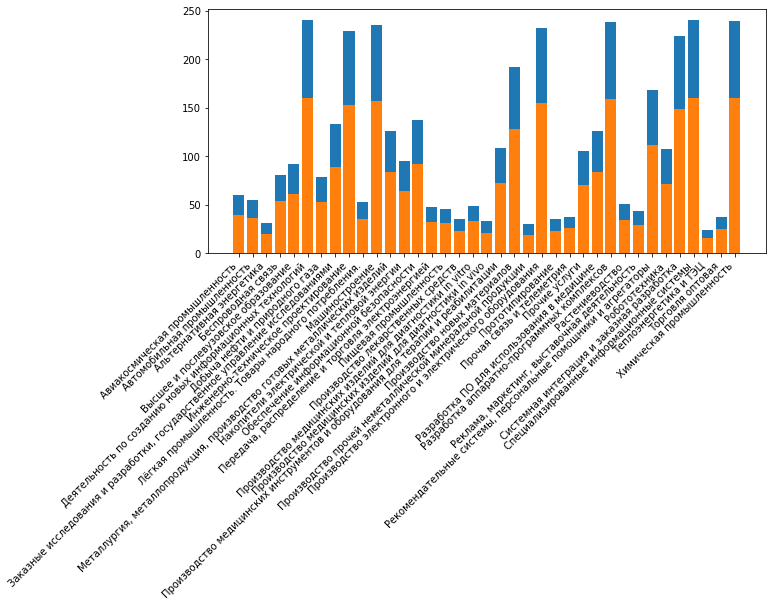

In [ ]:
# Проверка сбалансированности выборок по классам
fig = plt.figure(figsize=(10, 5))
c_train = np.bincount(np.argmax(y_train, axis=1))
c_test = np.bincount(np.argmax(y_test, axis=1))
plt.bar(CLASS_LIST, c_train)
plt.bar(CLASS_LIST, c_test)
fig.autofmt_xdate(rotation=45)
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               3000100   
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 37)               

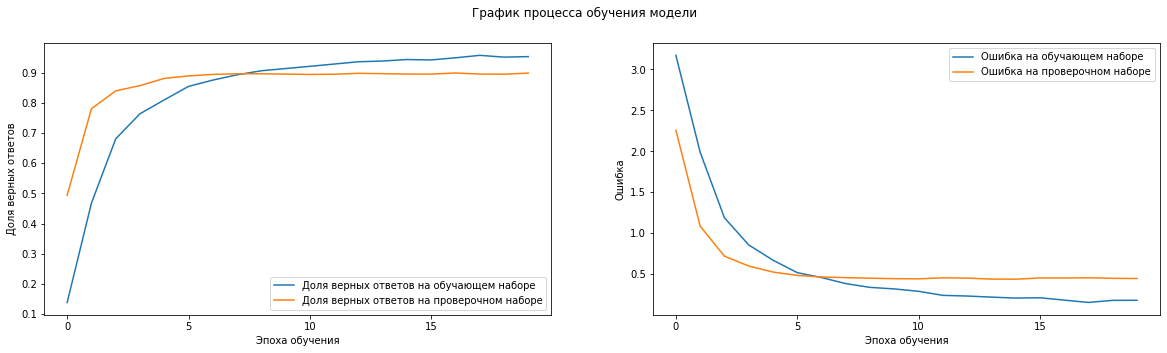

86/86 [==============================] - 1s 6ms/step


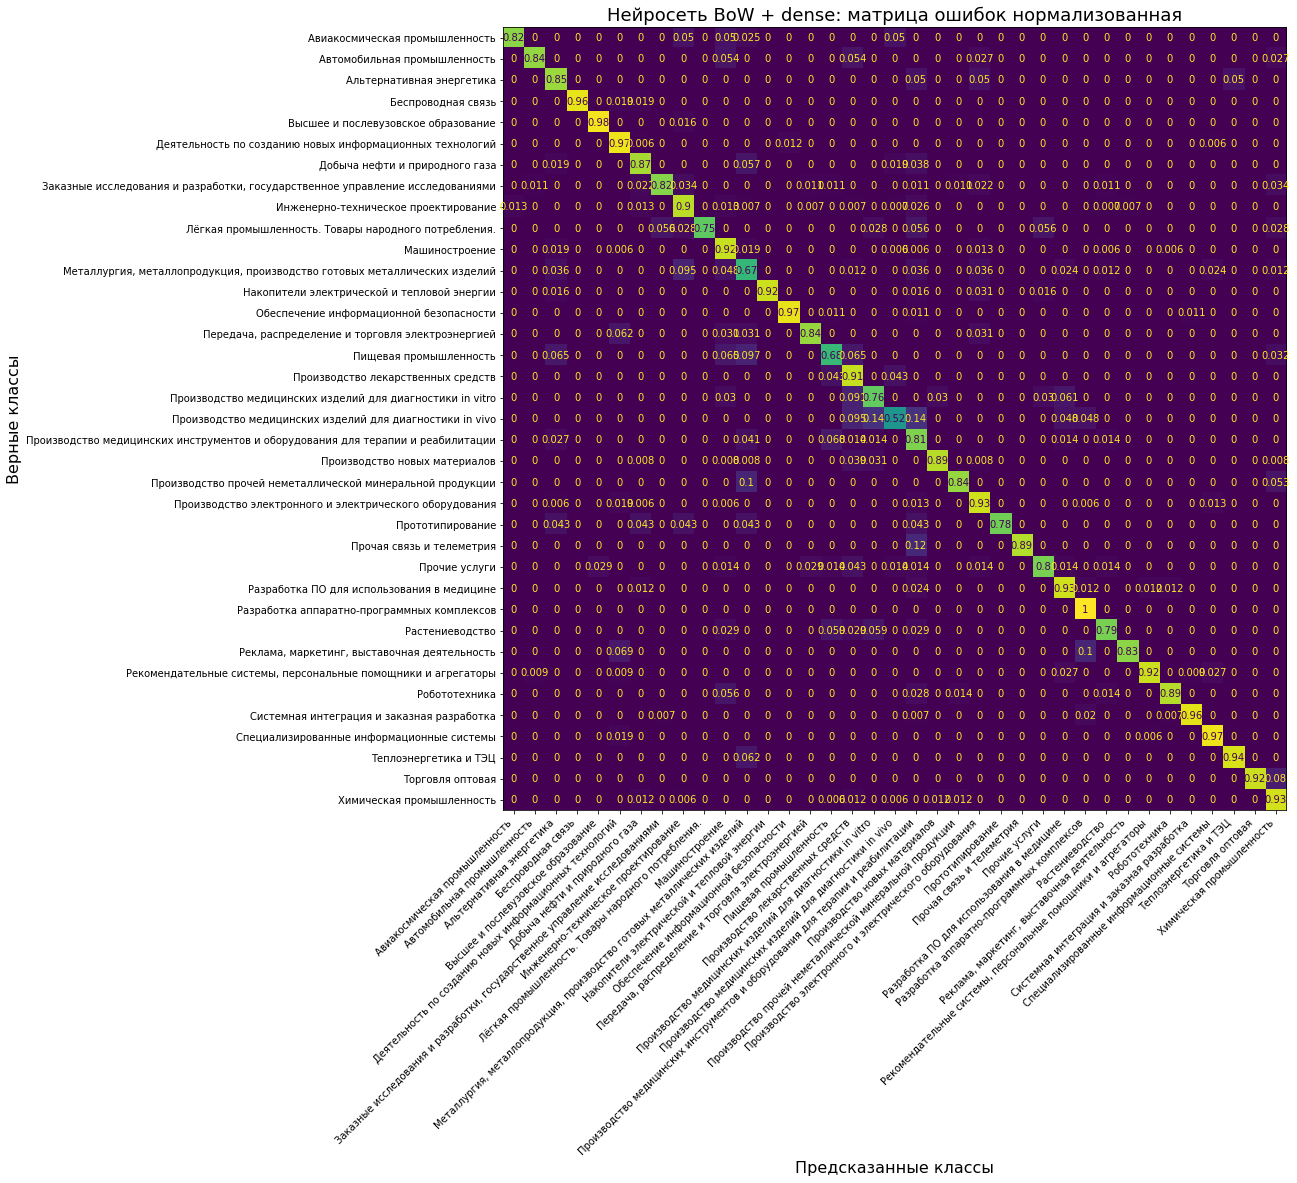

----------------------------------------------------------------------------------------------------
Нейросеть: BoW + dense
Класс: Авиакосмическая промышленность  82% сеть отнесла к классу Авиакосмическая промышленность - ВЕРНО :-)
Класс: Автомобильная промышленность  84% сеть отнесла к классу Автомобильная промышленность - ВЕРНО :-)
Класс: Альтернативная энергетика  85% сеть отнесла к классу Альтернативная энергетика - ВЕРНО :-)
Класс: Беспроводная связь    96% сеть отнесла к классу Беспроводная связь   - ВЕРНО :-)
Класс: Высшее и послевузовское образование  98% сеть отнесла к классу Высшее и послевузовское образование - ВЕРНО :-)
Класс: Деятельность по созданию новых информационных технологий  98% сеть отнесла к классу Деятельность по созданию новых информационных технологий - ВЕРНО :-)
Класс: Добыча нефти и природного газа  87% сеть отнесла к классу Добыча нефти и природного газа - ВЕРНО :-)
Класс: Заказные исследования и разработки, государственное управление исследованиями  82% се

In [ ]:
# Последовательная модель
model_text_bow_dense = Sequential()
# Входной полносвязный слой
model_text_bow_dense.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Второй полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Третий полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Выходной полносвязный слой
model_text_bow_dense.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_dense,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='BoW + dense')

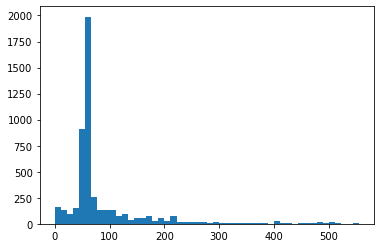

In [ ]:
# Построение гистограммы распределения длин текстов в словах основного набора
seq_len = [len(x) for x in x_data]
plt.hist(seq_len, 50)
plt.show()

In [ ]:
# Снижение размерности входных данных:
# ограничение длины последовательностей до разумного предела
seq_max_len = 200
x_train_clip = pad_sequences(x_train, maxlen=seq_max_len)
x_test_clip = pad_sequences(x_test, maxlen=seq_max_len)

# Проверка формы результата
print(x_train_clip.shape, x_test_clip.shape)

(2966, 200) (1978, 200)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 50)           1500000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 50)          0         
 lDropout1D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 batch_normalization_4 (Batc  (None, 10000)            40000     
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 64)                640064    
                                                                 
 dropout_17 (Dropout)        (None, 64)               

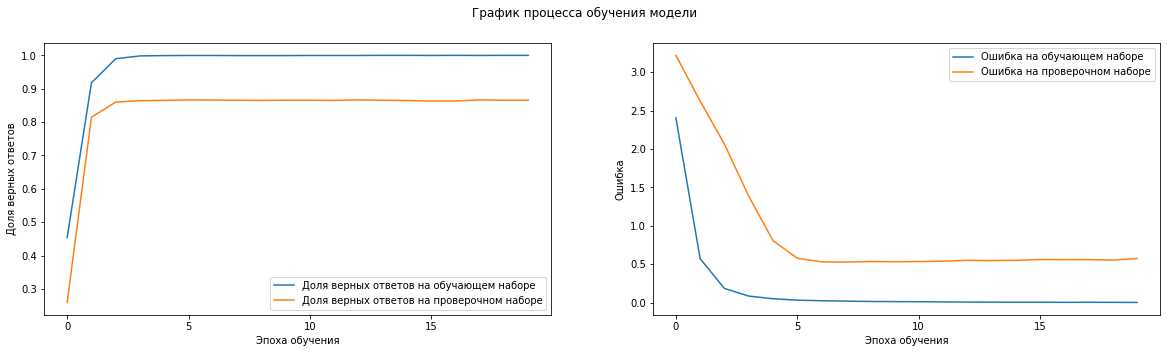

62/62 [==============================] - 0s 2ms/step


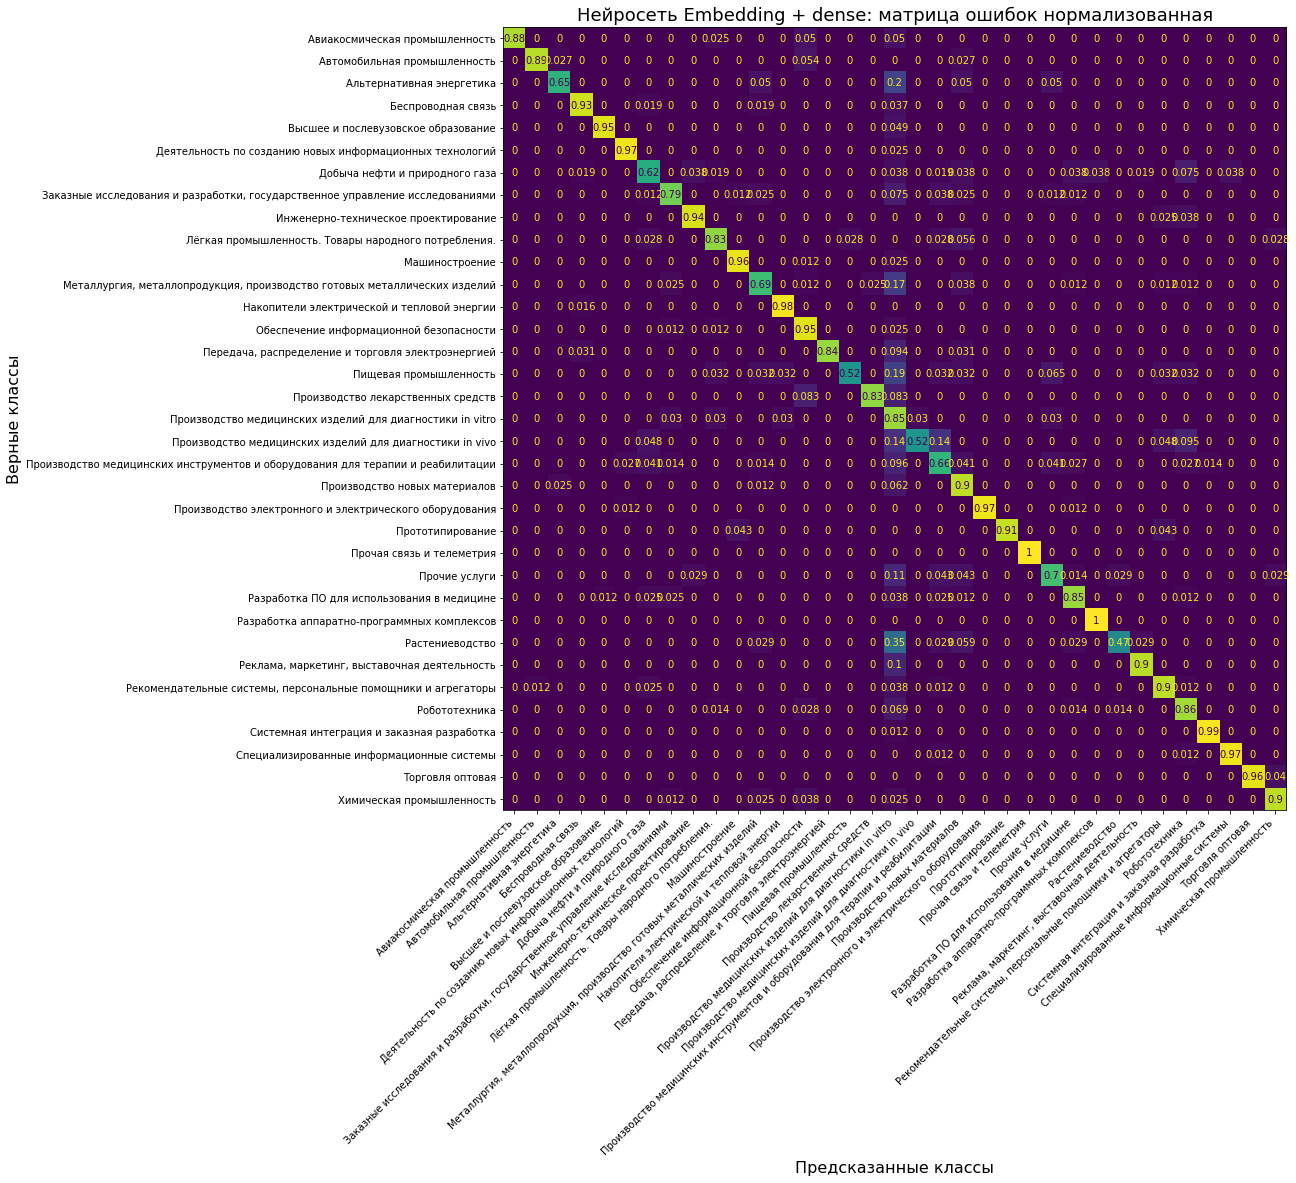

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding + dense
Класс: Авиакосмическая промышленность  88% сеть отнесла к классу Авиакосмическая промышленность - ВЕРНО :-)
Класс: Автомобильная промышленность  89% сеть отнесла к классу Автомобильная промышленность - ВЕРНО :-)
Класс: Альтернативная энергетика  65% сеть отнесла к классу Альтернативная энергетика - ВЕРНО :-)
Класс: Беспроводная связь    93% сеть отнесла к классу Беспроводная связь   - ВЕРНО :-)
Класс: Высшее и послевузовское образование  95% сеть отнесла к классу Высшее и послевузовское образование - ВЕРНО :-)
Класс: Деятельность по созданию новых информационных технологий  98% сеть отнесла к классу Деятельность по созданию новых информационных технологий - ВЕРНО :-)
Класс: Добыча нефти и природного газа  62% сеть отнесла к классу Добыча нефти и природного газа - ВЕРНО :-)
Класс: Заказные исследования и разработки, государственное управление исследованиями  

In [ ]:
# Последовательная модель
model_text_emb_dense = Sequential()
# Cлой эмбеддингов
model_text_emb_dense.add(Embedding(VOCAB_SIZE, 50, input_length=seq_max_len))
# Слой регуляризации Dropout
model_text_emb_dense.add(SpatialDropout1D(0.2))
# Cлой преобразования многомерных данных в одномерные
model_text_emb_dense.add(Flatten())
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Полносвязный слой
model_text_emb_dense.add(Dense(64, activation="relu"))
# Слой регуляризации Dropout
model_text_emb_dense.add(Dropout(0.2))
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Выходной полносвязный слой
model_text_emb_dense.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_text_emb_dense,
                         x_train_clip, y_train,
                         x_test_clip, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='Embedding + dense')

## **Модель ОКПД**

In [ ]:
# Функция вывода сводки по распределению данных
def data_summary(df, Подотрасль):
    for cls in Подотрасль:
        print(f'Количество записей класса {cls}: {df[df.Подотрасль == cls].shape[0]}')  

## anvil

In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server
anvil.server.connect("4JRGT4YFRHXVKN2E6DCZ236W-BMK4WG3FUTLLY6FJ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
